# Préparez des données pour un organisme de santé publique

# Import des packagings 

In [2]:
# Importations de bibliothèques standard
import os
import zipfile
from datetime import datetime
from io import BytesIO

# Importations de bibliothèques tierces
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer  # nécessaire pour activer IterativeImputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Importer le fichier avec une fonction qui nous permet de recharger les données quand nous le souhaitons (si la table est modifiée). 

In [3]:
def load_data():
    url = "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip"
    csv_filename = "fr.openfoodfacts.org.products.csv"
    local_csv = "fr.openfoodfacts.org.products.csv"  # Fichier CSV local pour les données existantes

    # Demande si l'utilisateur veut recharger les données
    recharger = input("Voulez-vous recharger les données depuis l'URL ? (oui/non): ").strip().lower()

    if recharger == 'oui':
        try:
            # Télécharger le fichier ZIP à partir de l'URL
            print("Téléchargement du fichier ZIP...")
            response = requests.get(url)
            
            if response.status_code == 200:
                print("Fichier ZIP téléchargé avec succès.")
                # Ouvrir le fichier ZIP directement en mémoire
                with zipfile.ZipFile(BytesIO(response.content)) as thezip:
                    # Lister tous les fichiers présents dans le ZIP pour déboguer
                    print("Fichiers dans le ZIP :", thezip.namelist())

                    # Vérifier si le fichier CSV existe dans le ZIP
                    if csv_filename in thezip.namelist():
                        print(f"Extraction et lecture du fichier {csv_filename}...")
                        # Extraire et lire le fichier CSV directement en tant que DataFrame
                        with thezip.open(csv_filename) as thefile:
                            data = pd.read_csv(thefile, sep='\t')  # Utiliser tabulation comme séparateur
                        print("Données rechargées avec succès.")

                        # Sauvegarder les données localement
                        data.to_csv(local_csv, index=False)
                        print(f"Données sauvegardées localement dans {local_csv}.")
                    else:
                        print(f"Le fichier {csv_filename} n'existe pas dans le ZIP.")
                        data = None
            else:
                print(f"Erreur lors du téléchargement des données. Code d'erreur HTTP : {response.status_code}")
                data = None
        except Exception as e:
            print(f"Erreur lors du chargement des données : {e}")
            data = None
    else:
        # Si l'utilisateur ne veut pas recharger, utiliser le fichier local s'il existe
        if os.path.exists(local_csv):
            print(f"Chargement des données depuis le fichier local {local_csv}.")
            data = pd.read_csv(local_csv, sep='\t')  # Utiliser tabulation comme séparateur pour le fichier local
        else:
            print(f"Le fichier local {local_csv} n'existe pas. Impossible de charger les données.")
            data = None

    return data

# Exemple d'utilisation :
if __name__ == "__main__":
    df = load_data()

    if df is not None and not df.empty:
        # Vous pouvez afficher ou manipuler les données ici
        print(df.head())  # Par exemple, afficher les 5 premières lignes
    else:
        print("Aucune donnée à afficher ou données non chargées.")


Voulez-vous recharger les données depuis l'URL ? (oui/non): oui
Téléchargement du fichier ZIP...
Fichier ZIP téléchargé avec succès.
Fichiers dans le ZIP : ['fr.openfoodfacts.org.products.csv', '__MACOSX/', '__MACOSX/._fr.openfoodfacts.org.products.csv']
Extraction et lecture du fichier fr.openfoodfacts.org.products.csv...


C:\Users\mario\AppData\Local\Temp\ipykernel_1420\3149247934.py:27: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(thefile, sep='\t')  # Utiliser tabulation comme séparateur


Données rechargées avec succès.
Données sauvegardées localement dans fr.openfoodfacts.org.products.csv.
    code                                                url  \
0   3087  http://world-fr.openfoodfacts.org/produit/0000...   
1   4530  http://world-fr.openfoodfacts.org/produit/0000...   
2   4559  http://world-fr.openfoodfacts.org/produit/0000...   
3  16087  http://world-fr.openfoodfacts.org/produit/0000...   
4  16094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:1

In [4]:
### lire le fichier 
pd.set_option('display.max_columns', None)
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

# analyse et néttoyage

In [5]:
df.shape 

(320772, 162)

In [6]:
print(df.dtypes)

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object


# visualiser les données grace à des graphiques dans l'etat  : 

# graphique 1: 

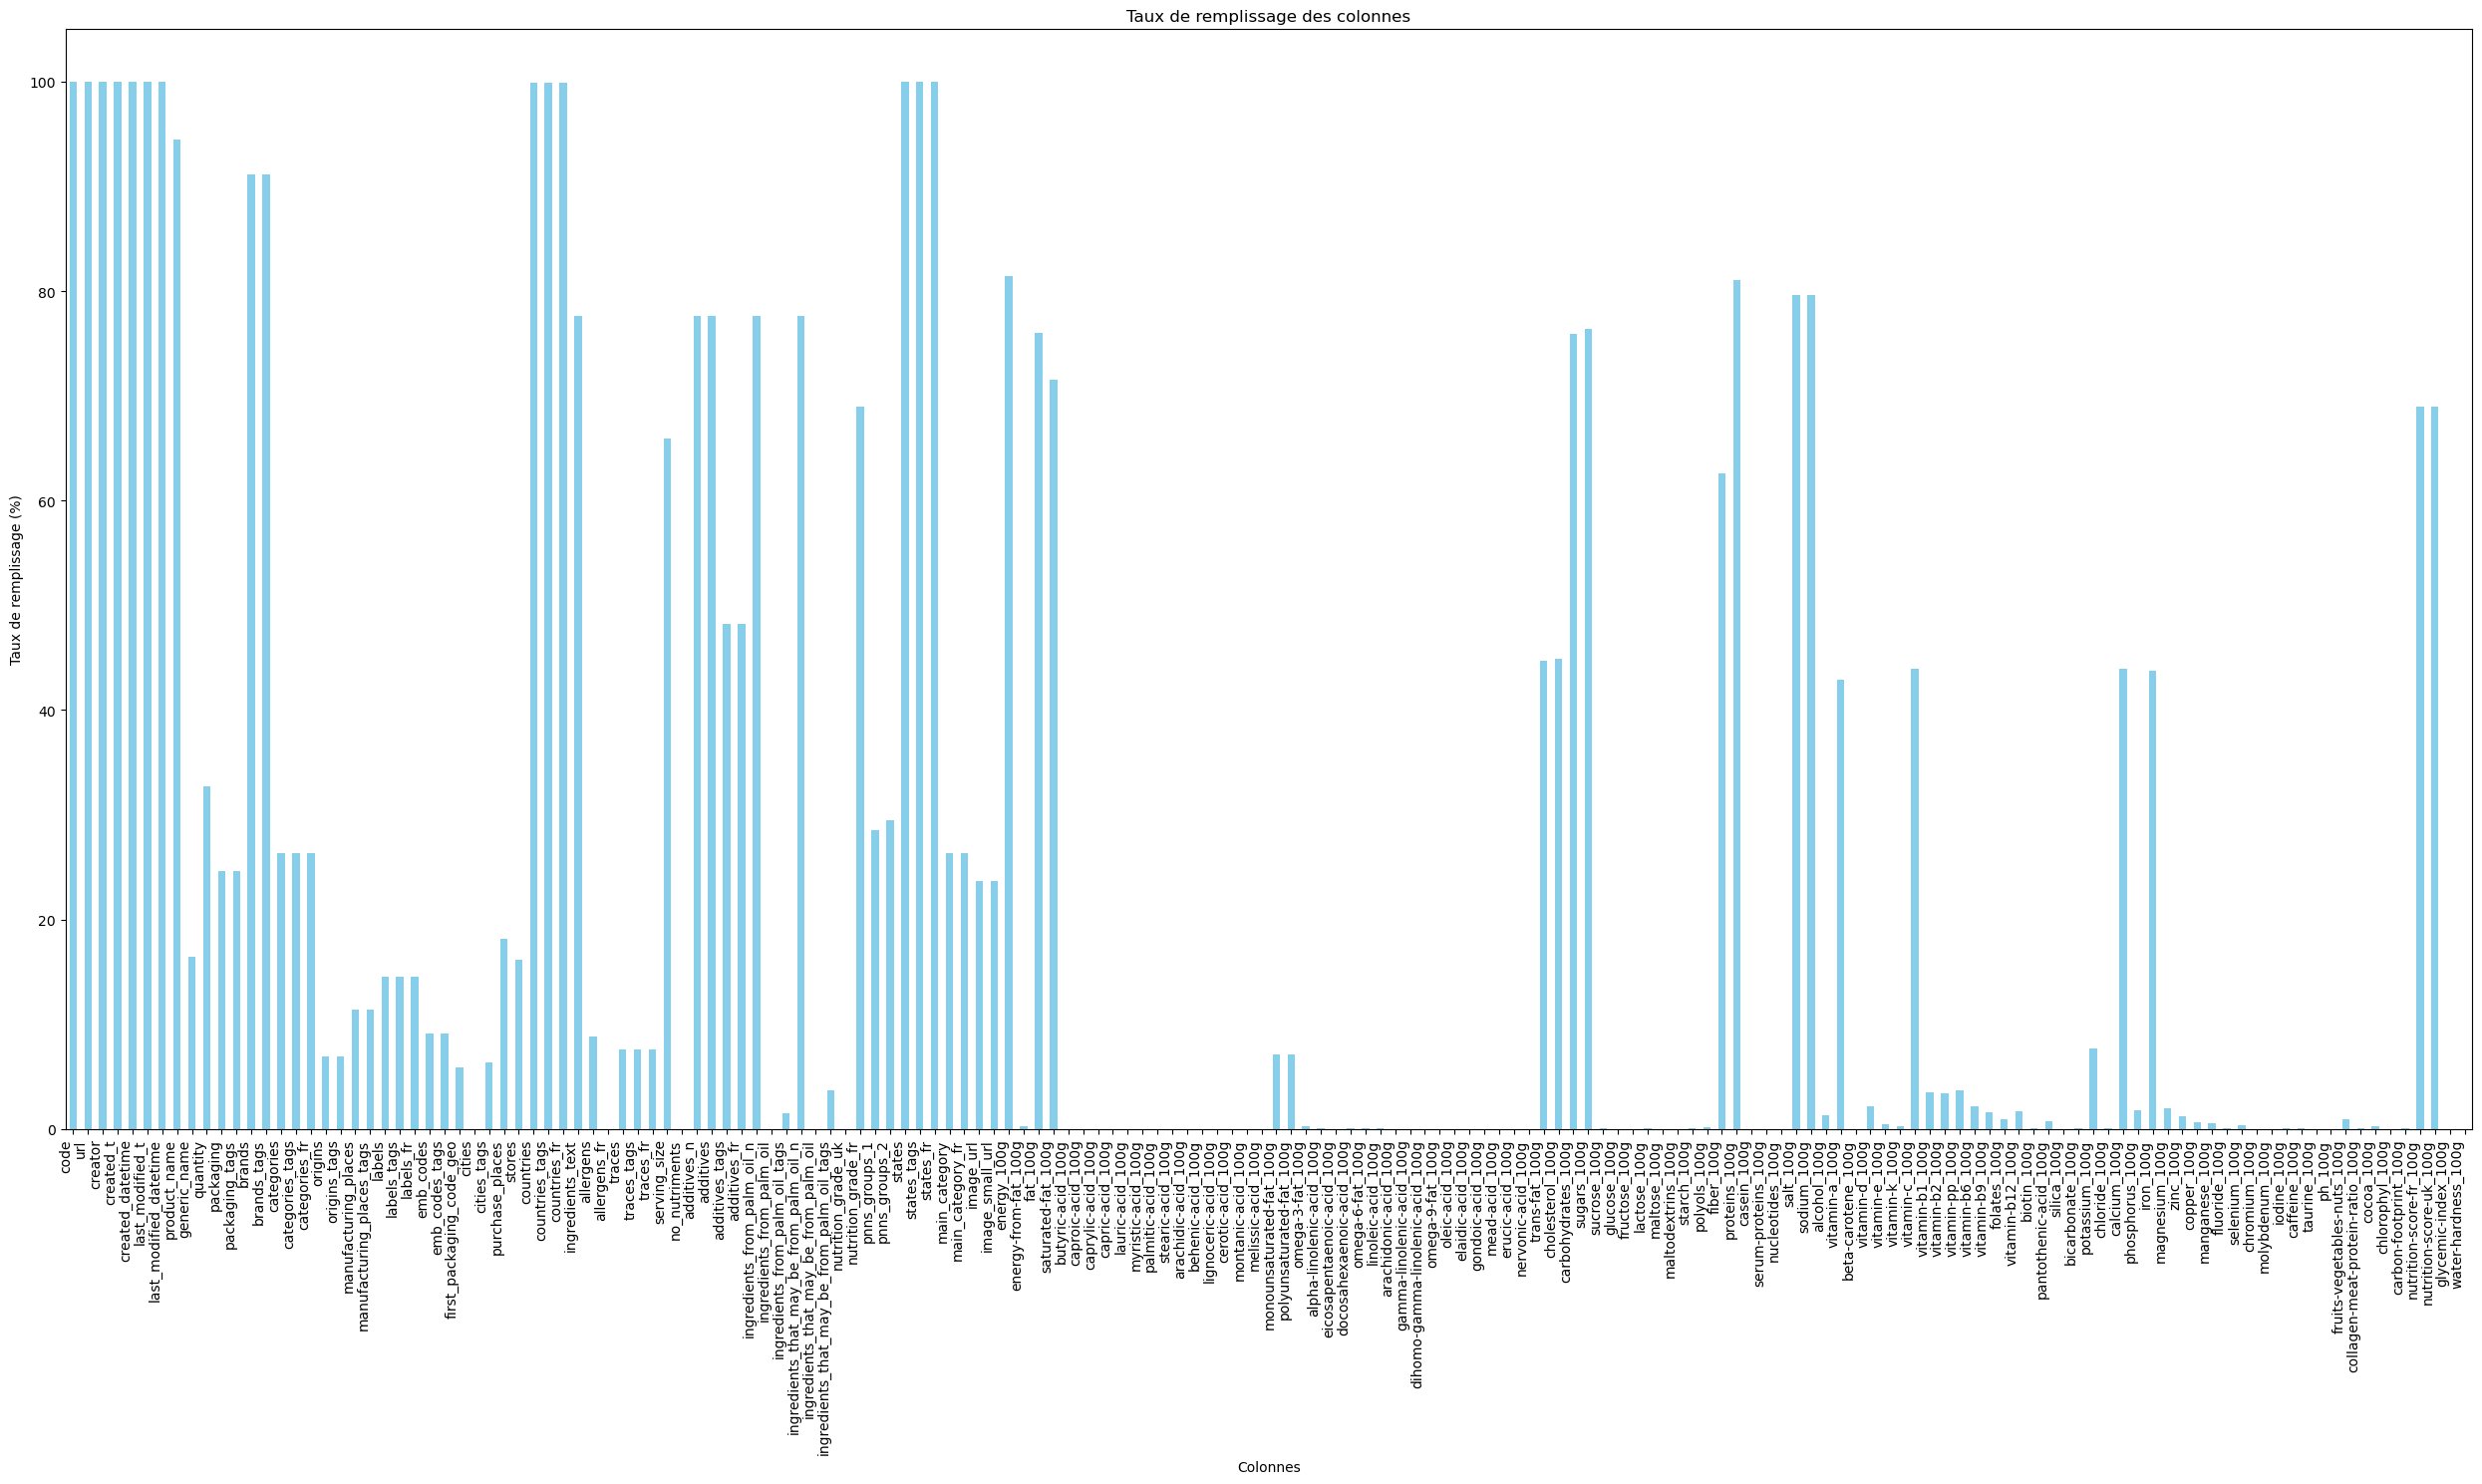

In [7]:
# Calculer le taux de remplissage de chaque colonne
fill_rate = df.notna().mean() * 100

# Créer un graphique
plt.figure(figsize=(25, 15))
fill_rate.plot(kind='bar', color='skyblue')
plt.title('Taux de remplissage des colonnes')
plt.xlabel('Colonnes')
plt.ylabel('Taux de remplissage (%)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Afficher le graphique
plt.show()

# graphique 2: 

code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

Résumé des données manquantes :
water-hardness_100g                      320772
no_nutriments                            320772
ingredients_that_may_be_from_palm_oil    320772
nutrition_grade_uk                       320772
nervonic-acid_100g                       320772
                                          ...  
created_datetime                              9
created_t                                     3
creator                                       2
last_modified_datetime                        0
last_modified_t                               0
Length: 162, dtype: int64


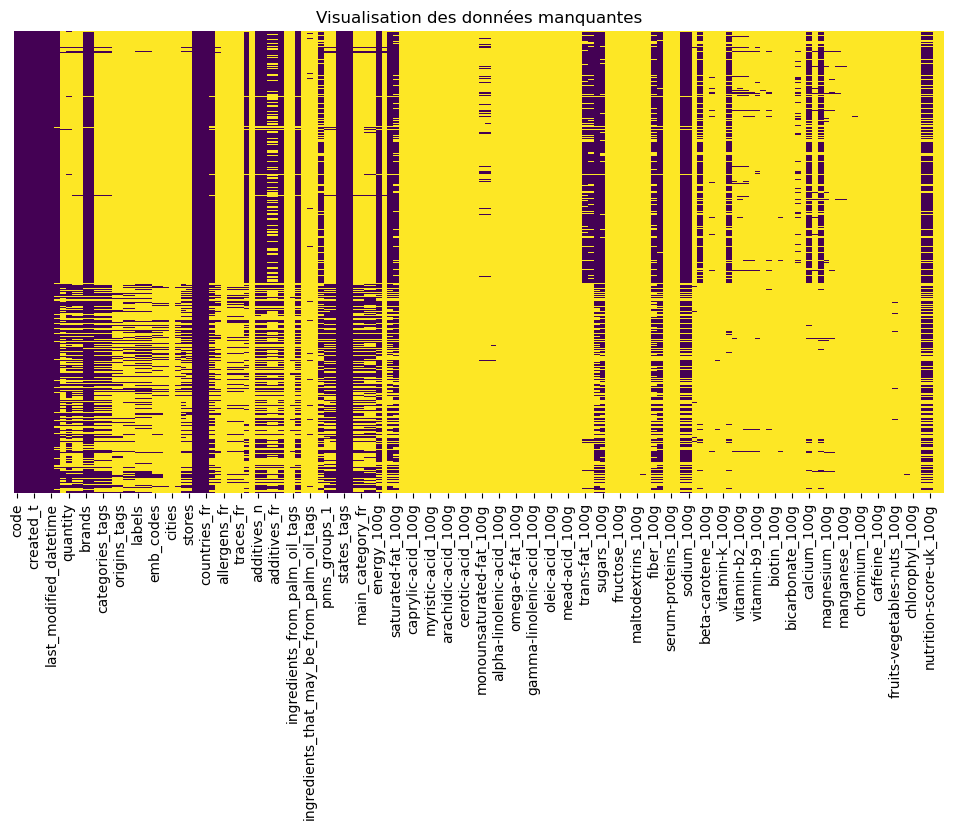

In [8]:
# Vérifier les données manquantes
missing_data = df.isnull().sum()

# Afficher les résultats
print(missing_data)

# Optionnel: Afficher un résumé plus complet
print("\nRésumé des données manquantes :")
print(df.isnull().sum().sort_values(ascending=False))

# Optionnel: Afficher un graphique pour visualiser les données manquantes


plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Visualisation des données manquantes')
plt.show()

# analyse de la colonne code : 

# Étape 1 : Calculer le nombre de doublons

In [9]:
# Trouver les doublons dans la colonne 'code'
doublons = df[df.duplicated(subset='code', keep=False)]

# Compter le nombre de lignes avec des doublons
nombre_doublons = doublons.shape[0]

# Afficher le nombre de doublons
print(f"Nombre de doublons dans la colonne 'code' : {nombre_doublons}")

Nombre de doublons dans la colonne 'code' : 245


# Étape 2 : Calculer le nombre de valeurs NaN

In [10]:
# Trouver les valeurs NaN dans la colonne 'code'
nan_values = df[df['code'].isna()]

# Compter le nombre de lignes avec des valeurs NaN
nombre_nan = nan_values.shape[0]

# Afficher le nombre de valeurs NaN
print(f"Nombre de valeurs NaN dans la colonne 'code' : {nombre_nan}")

Nombre de valeurs NaN dans la colonne 'code' : 23


# Étape 3 : Créer le graphique circulaire
Fusion des doublons et des valeurs NaN pour le graphique

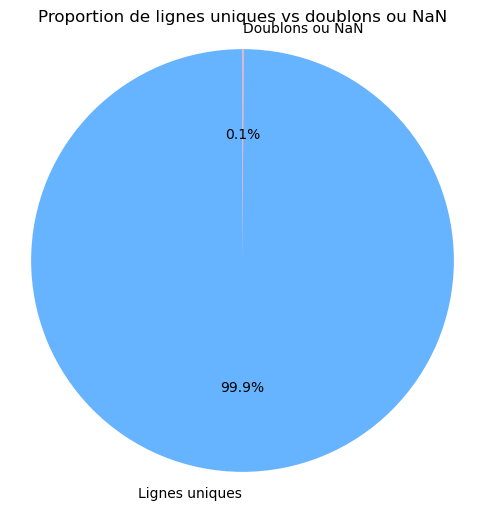

In [11]:
# Total de doublons et de NaN combinés
nombre_doublons_nan = nombre_doublons + nombre_nan

# Calculer les pourcentages
total_lignes = len(df)
pourcentage_doublons_nan = (nombre_doublons_nan / total_lignes) * 100
pourcentage_non_doublons_nan = 100 - pourcentage_doublons_nan

# Créer un graphique circulaire pour visualiser la proportion
labels = ['Lignes uniques', 'Doublons ou NaN']
sizes = [pourcentage_non_doublons_nan, pourcentage_doublons_nan]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.axis('equal')  # Assure que le pie chart est en cercle
plt.title("Proportion de lignes uniques vs doublons ou NaN")
plt.show()

# Discision métier 
on décide de supprimer nombre_doublons_nan car cela ne represente que 0,1% du df (cela n'aura pas un grand impact) 

In [12]:
# Supprimer les doublons dans la colonne 'code'
df_sans_doublons = df.drop_duplicates(subset='code', keep='first')

# Supprimer les lignes contenant des valeurs NaN dans la colonne 'code'
df_sans_doublons_sans_nan = df_sans_doublons.dropna(subset=['code'])

# Afficher le DataFrame après suppression des doublons et des NaN
print(df.shape)


(320772, 162)


# quelles sont les colonnes à 100% vides ? 

In [13]:
# Vérifier quelles colonnes contiennent uniquement des NaN
columns_with_all_nan = df.columns[df.isna().all()].tolist()

print("Colonnes contenant uniquement des NaN :", columns_with_all_nan)

Colonnes contenant uniquement des NaN : ['no_nutriments', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_uk', 'butyric-acid_100g', 'caproic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'melissic-acid_100g', 'elaidic-acid_100g', 'mead-acid_100g', 'erucic-acid_100g', 'nervonic-acid_100g', 'chlorophyl_100g', 'glycemic-index_100g', 'water-hardness_100g']


# Décision métier :
Les utilisateurs ne remplissent pas ces colonnes, soit parce que les informations ne sont pas disponibles sur l'emballage, soit parce qu'elles ne sont pas utiles. De toute manière, nous ne pourrons rien faire à ce sujet !

In [14]:
# Supprimer les colonnes contenant uniquement des NaN
df = df.dropna(axis=1, how='all')

# Afficher les colonnes supprimées
print("Colonnes contenant uniquement des NaN ont été supprimées.")

Colonnes contenant uniquement des NaN ont été supprimées.


In [15]:
df.shape

(320772, 146)

# quelles sont les lignes 100% vides ? 

In [16]:
# Repérer les lignes qui sont entièrement vides (100 % NaN)
lignes_vides = df[df.isnull().all(axis=1)]

# Afficher les lignes vides
lignes_vides

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


# il n y a pas de lignes 100% vide 

# on va supprimer les colonnes qui se termine par _t 
en effet c'est des colonnes qui ont une forme incomprhénssible pour les usagers : 

In [17]:
# Supprimer les colonnes dont le nom se termine par '_t'
df = df.drop(df.filter(regex='_t$').columns, axis=1)

# Afficher les colonnes supprimées
print("Colonnes supprimées :", df.filter(regex='_t$').columns.tolist())
df.shape 

Colonnes supprimées : []


(320772, 144)

# Que faisons-nous des colonnes pas accés remplies ? 

In [18]:
# Partie 1 : Calcul du taux de remplissage de chaque colonne
taux_remplissage = df.notna().mean() * 100  # Pourcentage de valeurs non-NaN dans chaque colonne

# Afficher les colonnes avec moins de 50% de remplissage
colonnes_moins_50 = taux_remplissage[taux_remplissage < 50].index.tolist()
print("Colonnes remplies à moins de 50% :", colonnes_moins_50)


Colonnes remplies à moins de 50% : ['generic_name', 'quantity', 'packaging', 'packaging_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags', 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_fr', 'image_url', 'image_small_url', 'energy-from-fat_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'montanic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-

In [19]:
taux_remplissage = df.notna().mean() * 100  # Pourcentage de valeurs non-NaN dans chaque colonne

# Afficher les colonnes avec moins de 40% de remplissage
colonnes_moins_40 = taux_remplissage[taux_remplissage < 40].index.tolist()
print("Colonnes remplies à moins de 40% :", colonnes_moins_40)


Colonnes remplies à moins de 40% : ['generic_name', 'quantity', 'packaging', 'packaging_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags', 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_fr', 'image_url', 'image_small_url', 'energy-from-fat_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'montanic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_

In [20]:
taux_remplissage = df.notna().mean() * 100  # Pourcentage de valeurs non-NaN dans chaque colonne

# Afficher les colonnes avec moins de 30% de remplissage
colonnes_moins_30 = taux_remplissage[taux_remplissage < 30].index.tolist()
print("Colonnes remplies à moins de 30% :", colonnes_moins_30)


Colonnes remplies à moins de 30% : ['generic_name', 'packaging', 'packaging_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags', 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_fr', 'image_url', 'image_small_url', 'energy-from-fat_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'montanic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omeg

In [21]:
len(colonnes_moins_50)

112

In [22]:
len(colonnes_moins_40)

104

In [23]:
len(colonnes_moins_30)

103

# Décision métier :
Nous décidons de supprimer les colonnes remplies à moins de 50 %, afin que le remplissage soit le plus proche de la réalité. En effet, les informations ne peuvent pas être aléatoires (meme si elle sont), car il s'agit d'ingrédients et de quantités de nutriments. 

In [24]:
# Partie 2 : Supprimer les colonnes remplies à moins de 50%
df = df.drop(columns=colonnes_moins_50)

# Afficher un message confirmant la suppression
print("Les colonnes avec moins de 50% de remplissage ont été supprimées.")
df.shape

Les colonnes avec moins de 50% de remplissage ont été supprimées.


(320772, 32)

In [25]:
df.columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'brands', 'brands_tags', 'countries', 'countries_tags',
       'countries_fr', 'ingredients_text', 'serving_size', 'additives_n',
       'additives', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

# supression d'autre colonne qui se repetent : 

In [26]:
# Supprimer la colonne 'brands_tags'
df = df.drop(columns=['brands_tags'])

# Afficher le df après la suppression
print(df.shape)

(320772, 31)


In [27]:
# Supprimer la colonne 'countries', 'countries_tags'
df = df.drop(columns=['countries', 'countries_tags'])

# Afficher le df après la suppression
print(df.shape)

(320772, 29)


# Analyse des colonnes ingredients_from_palm_oil_n et ingredients_that_may_be_from_palm_oil_n

In [28]:
df['ingredients_from_palm_oil_n'].describe()

count    248939.000000
mean          0.019659
std           0.140524
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: ingredients_from_palm_oil_n, dtype: float64

In [29]:
df['ingredients_that_may_be_from_palm_oil_n'].describe()

count    248939.000000
mean          0.055246
std           0.269207
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: ingredients_that_may_be_from_palm_oil_n, dtype: float64

# déscision métier :  
on va suprimer la colonne ingredients_that_may_be_from_palm_oil_n parce que elle ne va rien apporter de plus dans l'analyse!  

In [30]:
# Supprimer la colonne 'ingredients_that_may_be_from_palm_oil_n'
df = df.drop(columns=['ingredients_that_may_be_from_palm_oil_n'])

# Afficher le df après la suppression
print(df.shape)

(320772, 28)


In [31]:
# Supprimer la colonne 'nutrition-score-uk_100g'
df = df.drop(columns=['nutrition-score-uk_100g'])

# Afficher le df après la suppression
print(df.shape)

(320772, 27)


In [32]:
# Supprimer la colonne 'states et states_tags'
df = df.drop(columns=['states' , 'states_tags'])

# Afficher le df après la suppression
print(df.shape)

(320772, 25)


# Analyse de la colonne additives : 

In [33]:
# Ajuster l'affichage pour ne pas tronquer les longues chaînes de caractères
pd.set_option('display.max_colwidth', None)

# Vérifier d'abord si la colonne 'additives' existe dans le df
if 'additives' in df.columns:
    # Afficher les 5 premières lignes de la colonne 'additives'
    print(df[['additives']].head(5))
    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                additives
0                                                                                                                                                                                                                                                                                                                                             

# compter le nombre d'additives et le remplire dans additives_n 

In [34]:
# Fonction pour compter le nombre d'additifs dans chaque ligne
def compter_additifs(chaine):
    # Vérifier que la valeur n'est pas nulle (NaN)
    if pd.notnull(chaine):
        # Compter le nombre de fois où un produit est entre les crochets []
        return chaine.count('[')
    return 0

# Appliquer la fonction à la colonne 'additives' et stocker le résultat dans la colonne 'additives_n'
df['additives_n'] = df['additives'].apply(compter_additifs)

# Afficher les 30 premières lignes avec la colonne 'additives' et le nombre d'additifs
df[['additives', 'additives_n']].head(30)

additives  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        NaN   
1                                                                                                                                  

In [35]:
pd.reset_option('display.max_colwidth')

# revoir le taux de remplissage des données : 

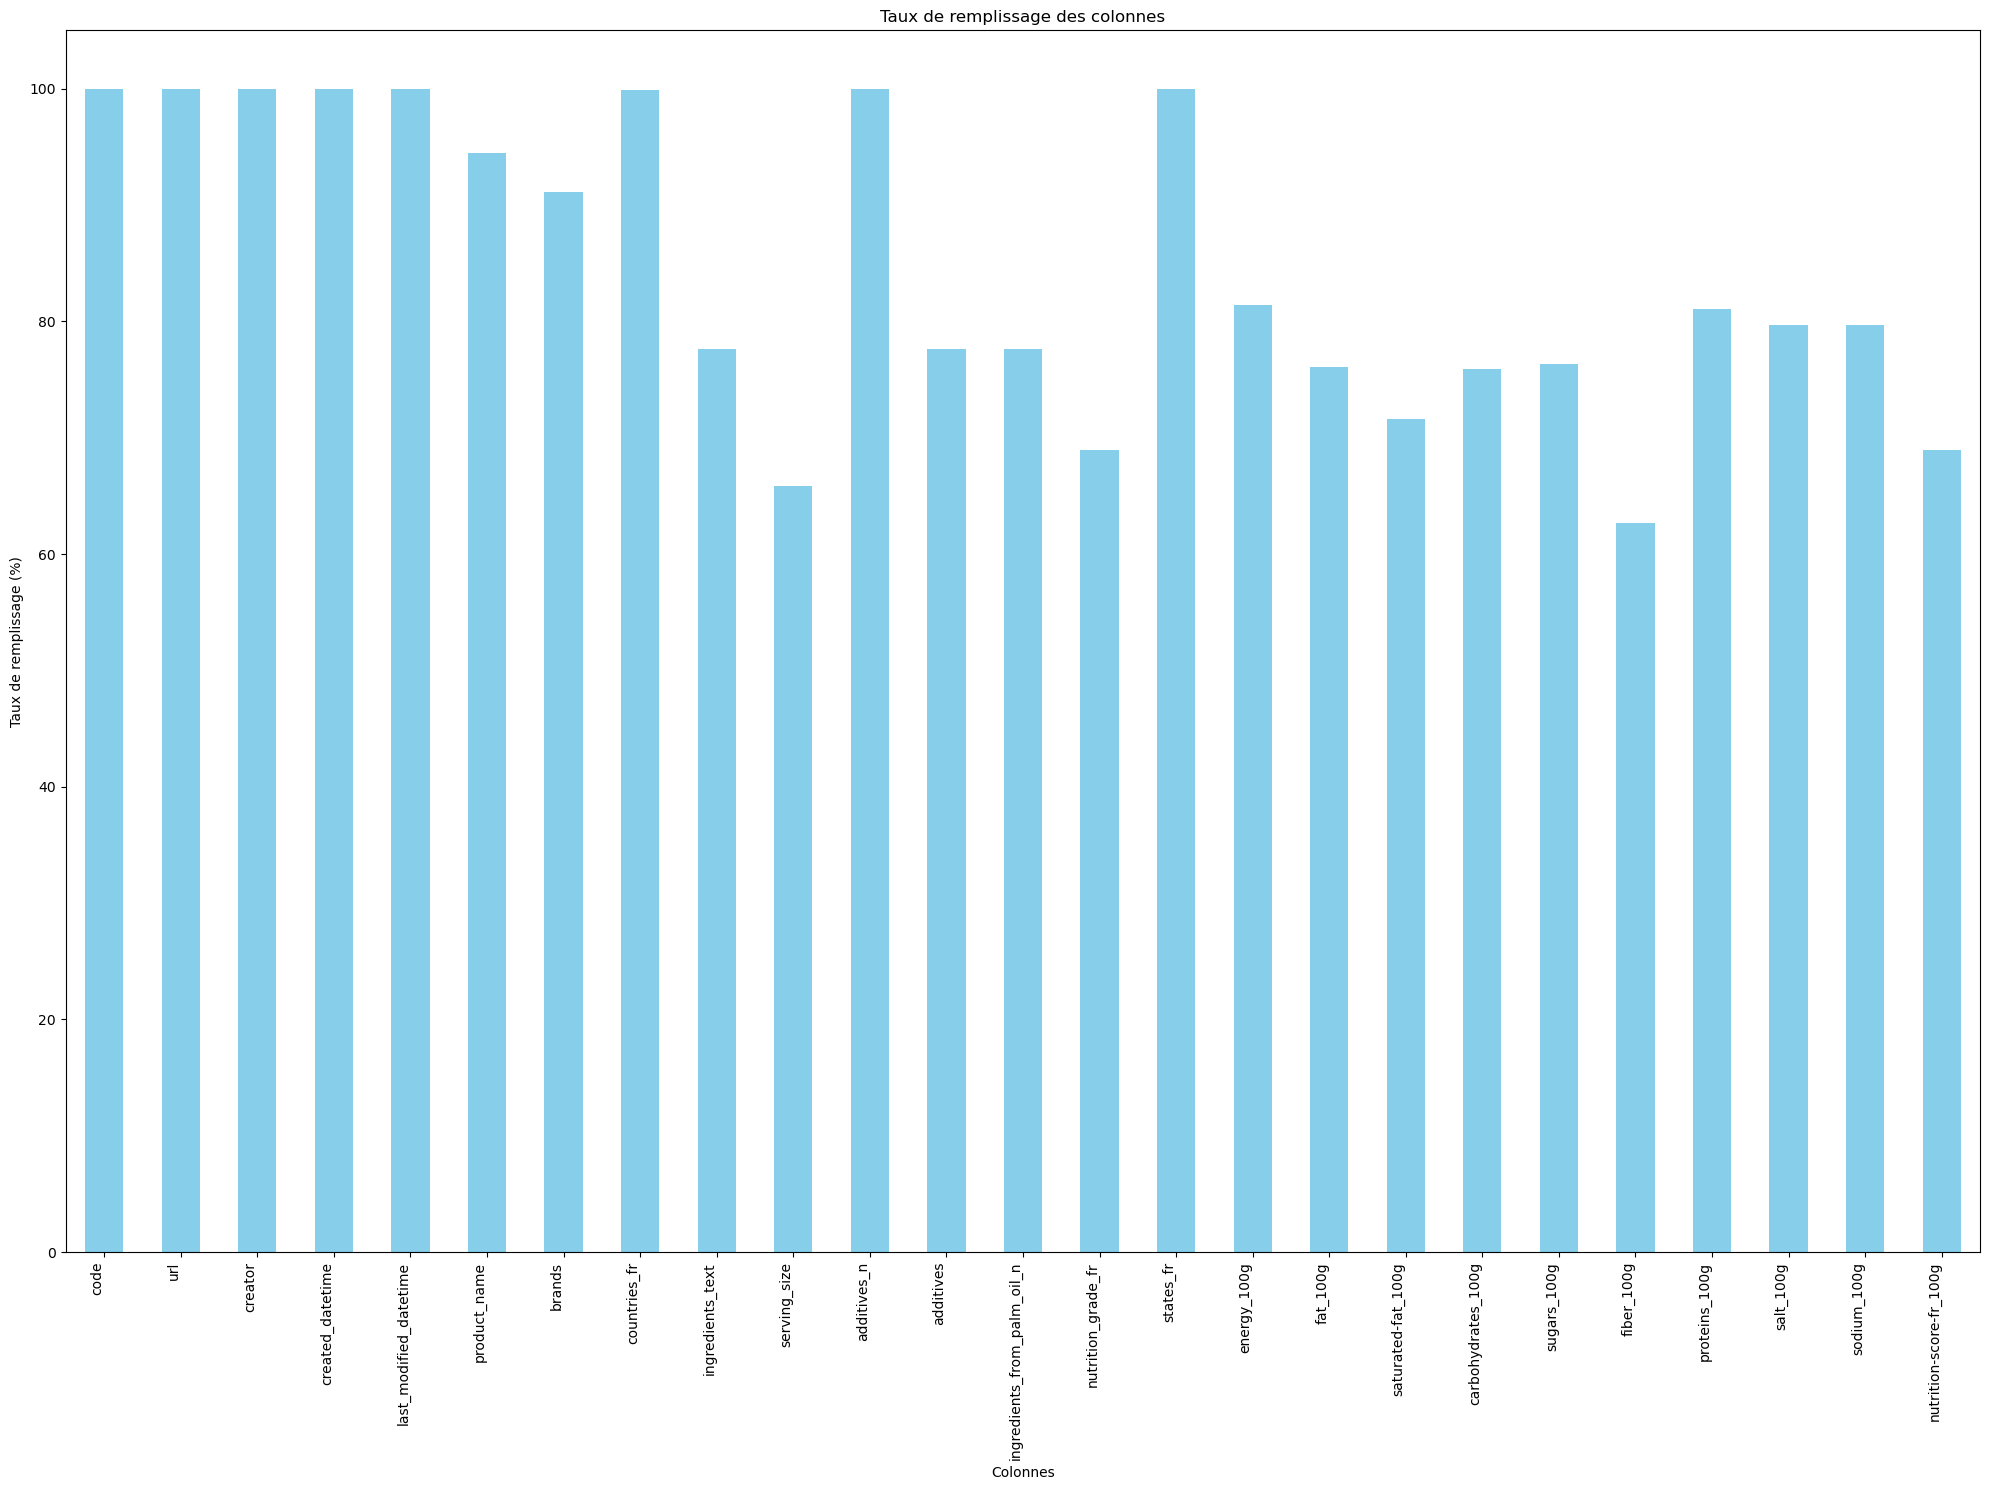

In [36]:
# Calculer le taux de remplissage de chaque colonne
fill_rate = df.notna().mean() * 100

# Créer un graphique
plt.figure(figsize=(20, 15))
fill_rate.plot(kind='bar', color='skyblue')
plt.title('Taux de remplissage des colonnes')
plt.xlabel('Colonnes')
plt.ylabel('Taux de remplissage (%)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Afficher le graphique
plt.show()

In [37]:
df['additives_n'].describe()

count    320772.000000
mean         19.987804
std          23.723137
min           0.000000
25%           2.000000
50%          14.000000
75%          32.000000
max         576.000000
Name: additives_n, dtype: float64

In [38]:
df['additives'].describe()

count                                                248905
unique                                               196069
top        [ extra-virgin-olive-oil -> en:extra-virgin-o...
freq                                                    397
Name: additives, dtype: object

# les analyses univariées 

In [40]:
# Liste des colonnes numériques
numerical_columns = [
    'energy_100g', 'fat_100g', 'saturated-fat_100g', 
    'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 
    'proteins_100g', 'salt_100g', 'sodium_100g', 
    'nutrition-score-fr_100g'
]

# Définir une méthode simple pour supprimer les outliers tout en conservant les NaNs
def remove_outliers_keep_nans(df, columns):
    """
    Supprime les valeurs aberrantes des colonnes spécifiées dans un DataFrame,
    tout en conservant les valeurs manquantes (NaNs).
    
    Args:
        df (pd.DataFrame): DataFrame original.
        columns (list): Liste des colonnes numériques à nettoyer.
    
    Returns:
        pd.DataFrame: Nouveau DataFrame sans valeurs aberrantes, avec NaNs conservés.
    """
    cleaned_df = df.copy()
    for col in columns:
        # Calcul des bornes de l'IQR
        Q1 = cleaned_df[col].quantile(0.25)  # Premier quartile
        Q3 = cleaned_df[col].quantile(0.75)  # Troisième quartile
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrer les outliers uniquement pour les valeurs non-NaN
        cleaned_df[col] = cleaned_df[col].where(
            (cleaned_df[col].isna()) |  # Conserver les NaNs
            ((cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound))  # Garder les valeurs normales
        )
    return cleaned_df

# Supprimer les valeurs aberrantes des colonnes numériques
cleaned_data = remove_outliers_keep_nans(df, numerical_columns)

# Boucle pour afficher les statistiques descriptives
print("Calcul des statistiques descriptives avant et après suppression des valeurs aberrantes :")

for col in numerical_columns:
    print(f"\n### Statistiques pour '{col}' ###")

    # Avant suppression des outliers
    print("\nAvant suppression des outliers :")
    print(df[col].describe())

    # Après suppression des outliers
    print("\nAprès suppression des outliers :")
    if col in cleaned_data.columns:
        print(cleaned_data[col].describe())
    else:
        print(f"La colonne '{col}' n'est pas présente dans les données nettoyées.")


Calcul des statistiques descriptives avant et après suppression des valeurs aberrantes :

### Statistiques pour 'energy_100g' ###

Avant suppression des outliers :
count    2.611130e+05
mean     1.141915e+03
std      6.447154e+03
min      0.000000e+00
25%      3.770000e+02
50%      1.100000e+03
75%      1.674000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64

Après suppression des outliers :
count    260033.000000
mean       1114.353744
std         781.782167
min           0.000000
25%         372.000000
50%        1094.000000
75%        1674.000000
max        3619.000000
Name: energy_100g, dtype: float64

### Statistiques pour 'fat_100g' ###

Avant suppression des outliers :
count    243891.000000
mean         12.730379
std          17.578747
min           0.000000
25%           0.000000
50%           5.000000
75%          20.000000
max         714.290000
Name: fat_100g, dtype: float64

Après suppression des outliers :
count    235491.000000
mean         10.489088
std    

In [41]:
cleaned_data

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,France,NaN,NaN,0,NaN,NaN,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),15,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,d,"A compléter,Informations nutritionnelles compl...",2243.0,28.57,NaN,64.29,14.29,3.6,3.57,0.00000,0.000,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),22,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,b,"A compléter,Informations nutritionnelles compl...",1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),12,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,d,"A compléter,Informations nutritionnelles compl...",2540.0,NaN,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,États-Unis,Organic polenta,35 g (0.25 cup),2,[ organic-polenta -> en:organic-polenta ] [...,0.0,NaN,"A compléter,Informations nutritionnelles compl...",1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,2017-03-27T16:14:59Z,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,Roumanie,NaN,NaN,0,NaN,NaN,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,2017-03-09T11:31:16Z,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,États-Unis,"Organic peppermint, organic lemon grass, organ...",20 g (0.7 oz),7,[ organic-peppermint -> en:organic-peppermint...,0.0,b,"A compléter,Informations nutritionnelles compl...",0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,2015-01-24T11:36:17Z,2017-04-03T18:34:59Z,乐吧泡菜味薯片,乐吧,Chine,NaN,NaN,0,NaN,NaN,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,2017-04-16T10:54:49Z,2017-04-16T10:54:49Z,Tomates aux Vermicelles,Knorr,France,NaN,NaN,0,NaN,NaN,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Skewness, Kurtosis et test de normalité (Shapiro-Wilk)

In [43]:
from scipy.stats import skew, kurtosis, shapiro

for col in numerical_columns:
    print(f"\nAnalyse de la normalité pour {col} :")
    print(f"Skewness (Asymétrie) : {skew(df[col].dropna()):.2f}")
    print(f"Kurtosis (Applatissement) : {kurtosis(df[col].dropna()):.2f}")
    
    # Test de Shapiro-Wilk
    stat, p = shapiro(df[col].dropna())
    print(f"Test de Shapiro-Wilk : p-value = {p:.5f}")
    if p > 0.05:
        print("→ Les données suivent une distribution normale.")
    else:
        print("→ Les données ne suivent pas une distribution normale.")



Analyse de la normalité pour energy_100g :
Skewness (Asymétrie) : 491.00
Kurtosis (Applatissement) : 247383.43


C:\Users\mario\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Test de Shapiro-Wilk : p-value = 0.00000
→ Les données ne suivent pas une distribution normale.

Analyse de la normalité pour fat_100g :
Skewness (Asymétrie) : 2.46
Kurtosis (Applatissement) : 17.18
Test de Shapiro-Wilk : p-value = 0.00000
→ Les données ne suivent pas une distribution normale.

Analyse de la normalité pour saturated-fat_100g :
Skewness (Asymétrie) : 4.82
Kurtosis (Applatissement) : 116.64
Test de Shapiro-Wilk : p-value = 0.00000
→ Les données ne suivent pas une distribution normale.

Analyse de la normalité pour carbohydrates_100g :
Skewness (Asymétrie) : 4.28
Kurtosis (Applatissement) : 362.55
Test de Shapiro-Wilk : p-value = 0.00000
→ Les données ne suivent pas une distribution normale.

Analyse de la normalité pour sugars_100g :
Skewness (Asymétrie) : 17.20
Kurtosis (Applatissement) : 2477.52
Test de Shapiro-Wilk : p-value = 0.00000
→ Les données ne suivent pas une distribution normale.

Analyse de la normalité pour fiber_100g :
Skewness (Asymétrie) : 363.55
Kurtosi

# Détection et suppression des outliers

In [44]:
# Suppression des outliers pour chaque colonne tout en conservant les NaNs
cleaned_data = df.copy()

for col in numerical_columns:
    # Calcul des bornes IQR
    Q1 = cleaned_data[col].quantile(0.25)
    Q3 = cleaned_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Conserver les valeurs dans les bornes ou les NaNs
    cleaned_data[col] = cleaned_data[col].where(
        (cleaned_data[col].isna()) |  # Conserver les NaNs
        ((cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound))  # Garder les valeurs normales
    )

print(f"Forme des données après suppression des outliers : {cleaned_data.shape}")



Forme des données après suppression des outliers : (320772, 25)


# Visualisation avant et après suppression des outliers

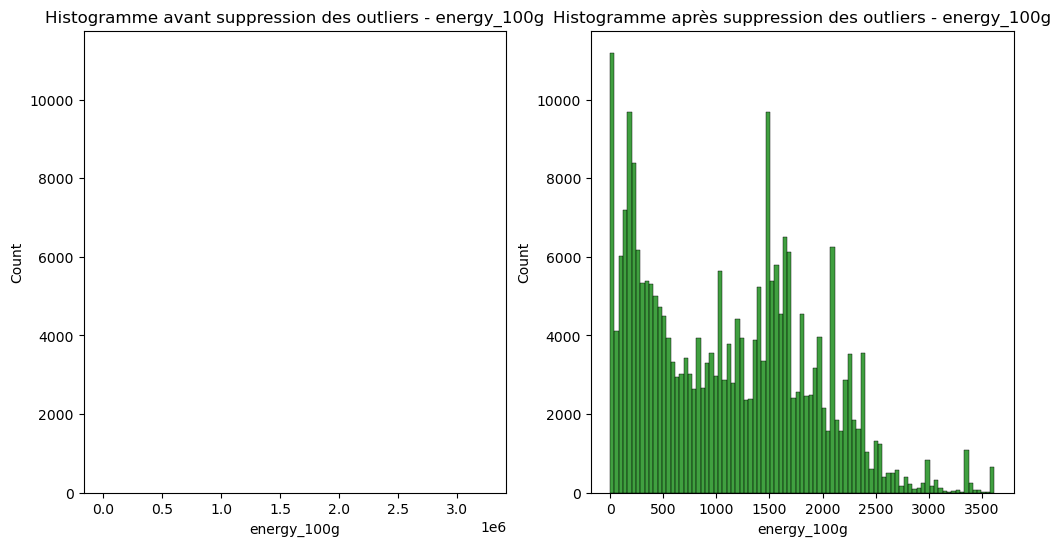

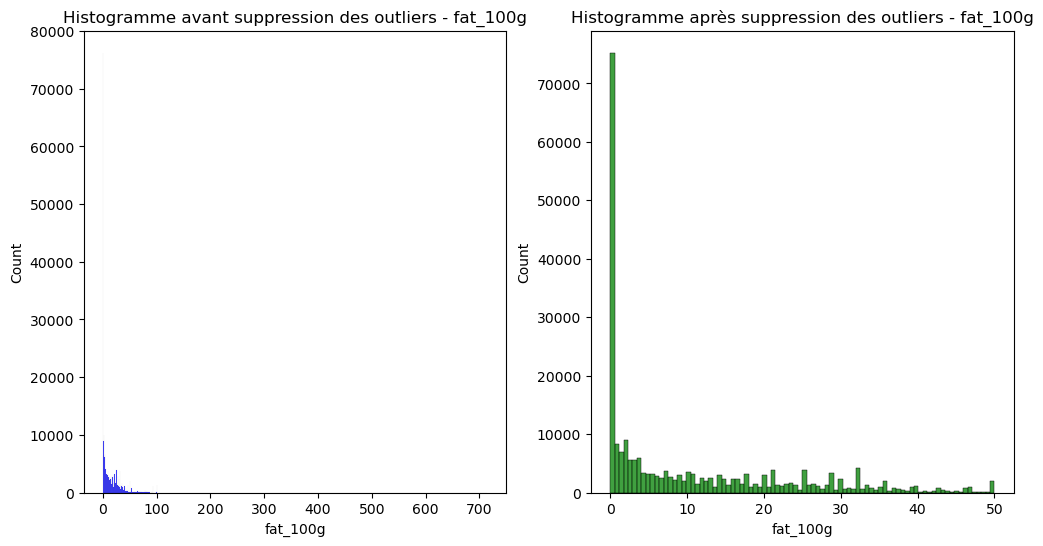

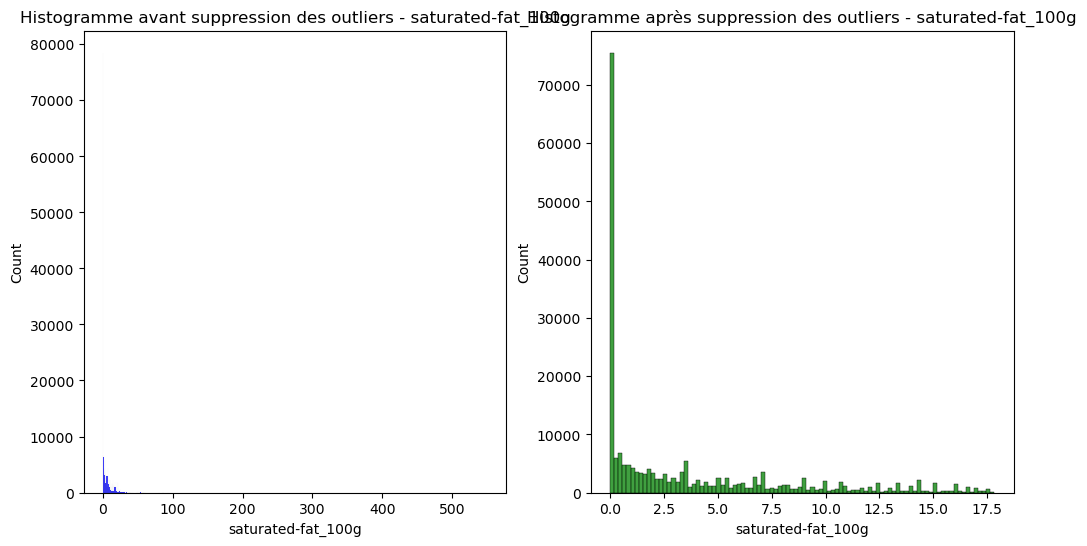

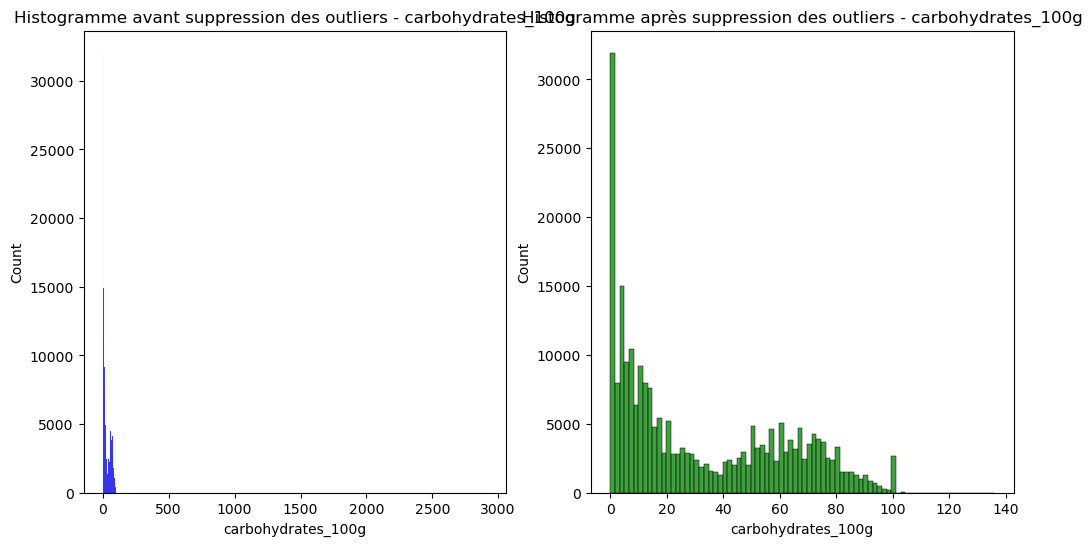

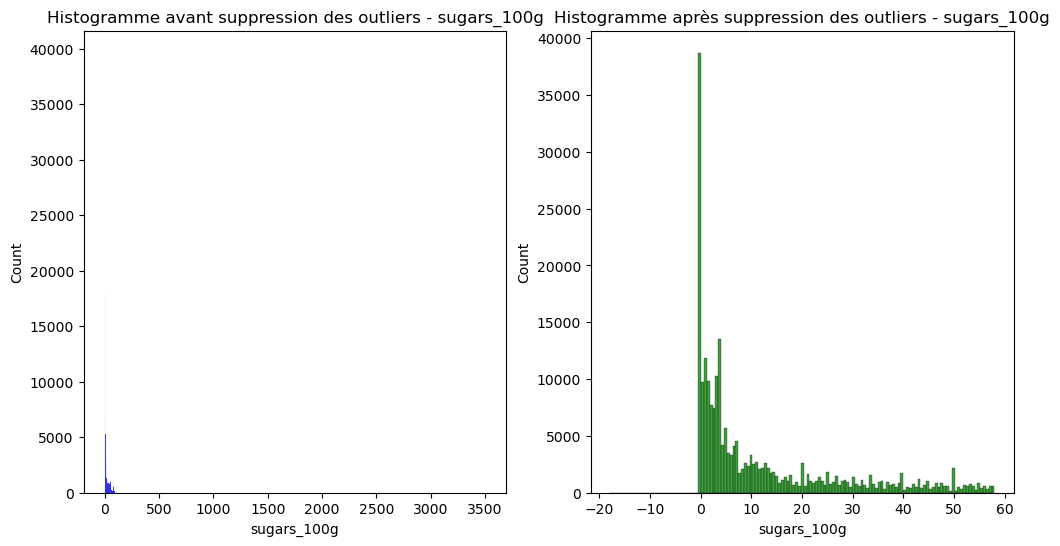

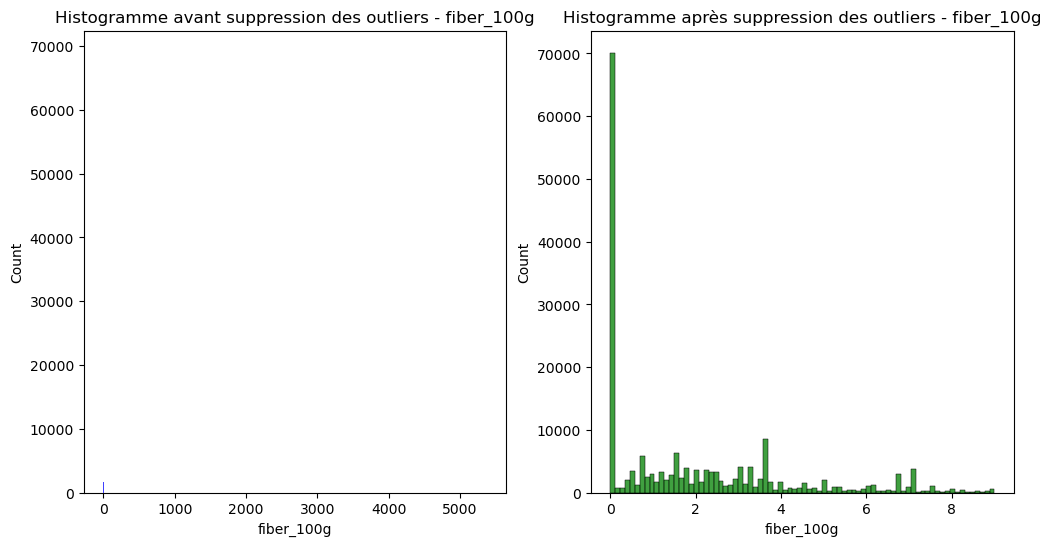

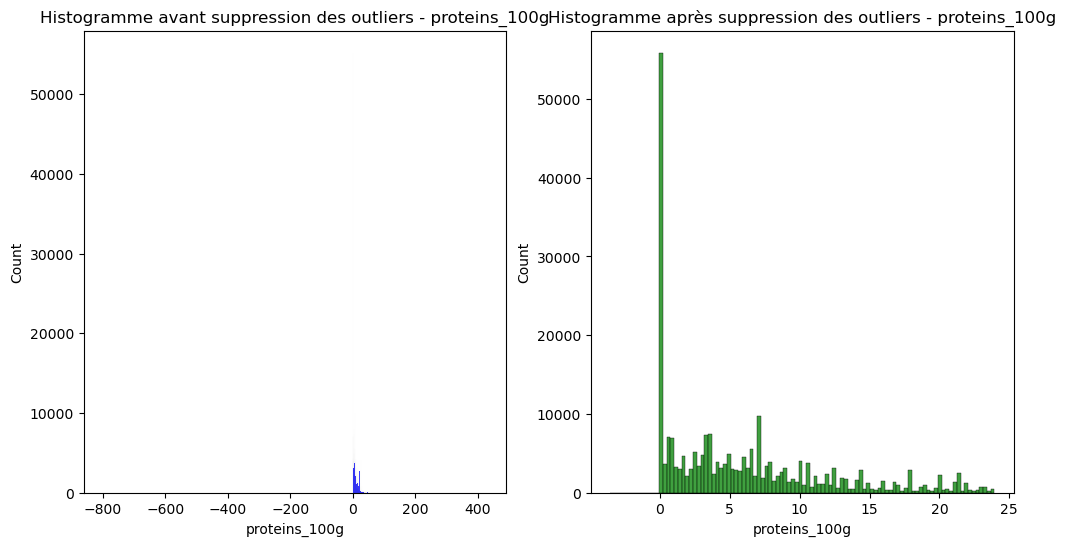

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002A554D572E0> (for post_execute):


KeyboardInterrupt: 

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(column, original_data, cleaned_data):
    """
    Affiche les histogrammes avant et après la suppression des outliers pour une colonne donnée.
    
    Args:
        column (str): Le nom de la colonne à tracer.
        original_data (DataFrame): Le DataFrame contenant les données originales.
        cleaned_data (DataFrame): Le DataFrame contenant les données nettoyées.
    """
    plt.figure(figsize=(12, 6))

    # Histogramme avant suppression
    plt.subplot(1, 2, 1)
    sns.histplot(original_data[column], kde=False, color='blue')
    plt.title(f"Histogramme avant suppression des outliers - {column}")

    # Histogramme après suppression
    plt.subplot(1, 2, 2)
    sns.histplot(cleaned_data[column], kde=False, color='green')
    plt.title(f"Histogramme après suppression des outliers - {column}")

    plt.show()

# Utilisation de la fonction
for col in numerical_columns:
    plot_histograms(col, df, cleaned_data)


# Analyse bivariée : Pourquoi ?
L’analyse bivariée permet d’explorer les relations entre deux variables.
Les objectifs principaux incluent :

Comprendre les corrélations entre variables numériques.
Comparer des distributions selon des groupes catégoriels.
Identifier des relations pour des hypothèses ou modèles prédictifs.
Les tests statistiques et visualisations dépendent de la normalité des variables.



# Corrélation entre variables numériques (heatmap)
Nous calculons la matrice de corrélation pour les colonnes numériques et utilisons une heatmap pour la visualiser.

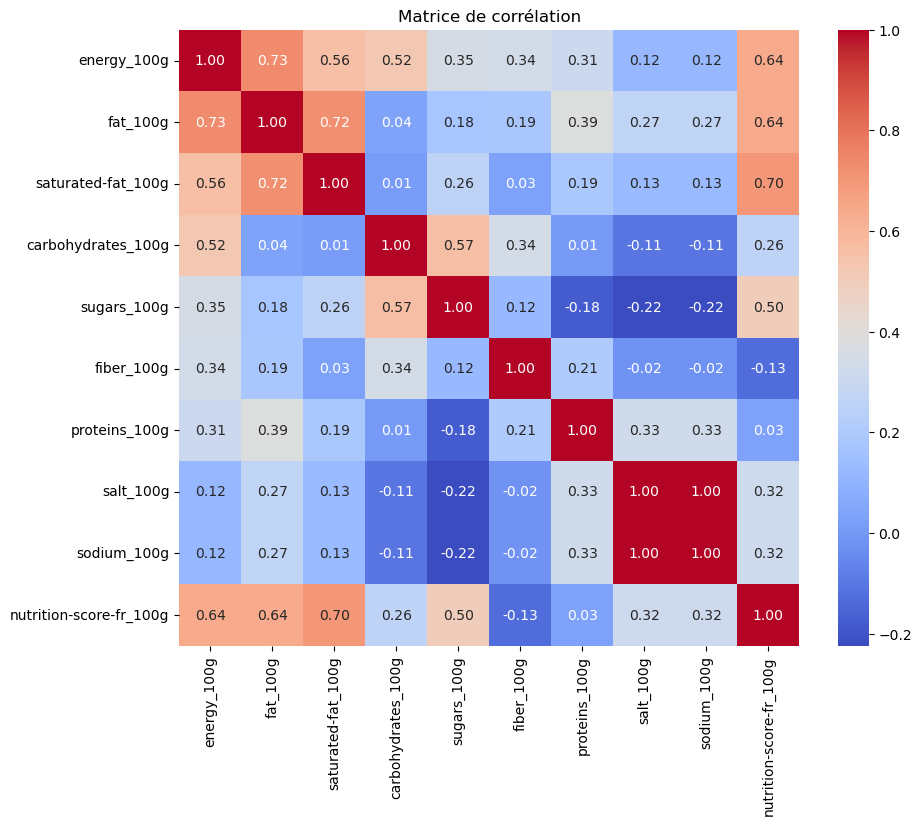

In [46]:
# Matrice de corrélation
corr_matrix = cleaned_data[numerical_columns].corr()

# Visualisation de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


# Tests statistiques selon la nature des variables
Variables numériques vs numériques : Test de corrélation :
Si les deux variables sont normales : Corrélation de Pearson.
Sinon : Corrélation de Spearman.
Variables numériques vs catégoriques : Test de comparaison :
Normalité et homoscédasticité (variance égale) : Test T.
Sinon : Test de Mann-Whitney ou Kruskal-Wallis.

# interprétation des corrélaltion  :  

In [147]:
cleaned_data = cleaned_data.dropna()

In [148]:
sample_data = cleaned_data.sample(n=5000, random_state=42)  # Prendre un sous-échantillon de 5000
corr, p = spearmanr(sample_data[col1], sample_data[col2])
print(f"Corrélation de Spearman entre {col1} et {col2} : {corr:.2f} (p-value = {p:.5f})")

Corrélation de Spearman entre energy_100g et fat_100g : 0.76 (p-value = 0.00000)


In [149]:
from scipy.stats import pearsonr, spearmanr

col1, col2 = 'energy_100g', 'fat_100g'
if shapiro(cleaned_data[col1].dropna())[1] > 0.05 and shapiro(cleaned_data[col2].dropna())[1] > 0.05:
    corr, p = pearsonr(cleaned_data[col1], cleaned_data[col2])
    print(f"Corrélation de Pearson entre {col1} et {col2} : {corr:.2f} (p-value = {p:.5f})")
else:
    corr, p = spearmanr(cleaned_data[col1], cleaned_data[col2])
    print(f"Corrélation de Spearman entre {col1} et {col2} : {corr:.2f} (p-value = {p:.5f})")


Corrélation de Spearman entre energy_100g et fat_100g : 0.77 (p-value = 0.00000)


C:\Users\mario\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [150]:
col1, col2 = 'energy_100g', 'saturated-fat_100g'
if shapiro(cleaned_data[col1].dropna())[1] > 0.05 and shapiro(cleaned_data[col2].dropna())[1] > 0.05:
    corr, p = pearsonr(cleaned_data[col1], cleaned_data[col2])
    print(f"Corrélation de Pearson entre {col1} et {col2} : {corr:.2f} (p-value = {p:.5f})")
else:
    corr, p = spearmanr(cleaned_data[col1], cleaned_data[col2])
    print(f"Corrélation de Spearman entre {col1} et {col2} : {corr:.2f} (p-value = {p:.5f})")

Corrélation de Spearman entre energy_100g et saturated-fat_100g : 0.60 (p-value = 0.00000)


In [151]:
col1, col2 = 'energy_100g', 'nutrition-score-fr_100g'
if shapiro(cleaned_data[col1].dropna())[1] > 0.05 and shapiro(cleaned_data[col2].dropna())[1] > 0.05:
    corr, p = pearsonr(cleaned_data[col1], cleaned_data[col2])
    print(f"Corrélation de Pearson entre {col1} et {col2} : {corr:.2f} (p-value = {p:.5f})")
else:
    corr, p = spearmanr(cleaned_data[col1], cleaned_data[col2])
    print(f"Corrélation de Spearman entre {col1} et {col2} : {corr:.2f} (p-value = {p:.5f})")

Corrélation de Spearman entre energy_100g et nutrition-score-fr_100g : 0.64 (p-value = 0.00000)


In [152]:
col1, col2 = 'energy_100g', 'carbohydrates_100g'
if shapiro(cleaned_data[col1].dropna())[1] > 0.05 and shapiro(cleaned_data[col2].dropna())[1] > 0.05:
    corr, p = pearsonr(cleaned_data[col1], cleaned_data[col2])
    print(f"Corrélation de Pearson entre {col1} et {col2} : {corr:.2f} (p-value = {p:.5f})")
else:
    corr, p = spearmanr(cleaned_data[col1], cleaned_data[col2])
    print(f"Corrélation de Spearman entre {col1} et {col2} : {corr:.2f} (p-value = {p:.5f})")

Corrélation de Spearman entre energy_100g et carbohydrates_100g : 0.76 (p-value = 0.00000)


In [153]:
col1, col2 = 'fat_100g', 'saturated-fat_100g'
if shapiro(cleaned_data[col1].dropna())[1] > 0.05 and shapiro(cleaned_data[col2].dropna())[1] > 0.05:
    corr, p = pearsonr(cleaned_data[col1], cleaned_data[col2])
    print(f"Corrélation de Pearson entre {col1} et {col2} : {corr:.2f} (p-value = {p:.5f})")
else:
    corr, p = spearmanr(cleaned_data[col1], cleaned_data[col2])
    print(f"Corrélation de Spearman entre {col1} et {col2} : {corr:.2f} (p-value = {p:.5f})")

Corrélation de Spearman entre fat_100g et saturated-fat_100g : 0.85 (p-value = 0.00000)


In [154]:
col1, col2 = 'fat_100g', 'nutrition-score-fr_100g'
if shapiro(cleaned_data[col1].dropna())[1] > 0.05 and shapiro(cleaned_data[col2].dropna())[1] > 0.05:
    corr, p = pearsonr(cleaned_data[col1], cleaned_data[col2])
    print(f"Corrélation de Pearson entre {col1} et {col2} : {corr:.2f} (p-value = {p:.5f})")
else:
    corr, p = spearmanr(cleaned_data[col1], cleaned_data[col2])
    print(f"Corrélation de Spearman entre {col1} et {col2} : {corr:.2f} (p-value = {p:.5f})")

Corrélation de Spearman entre fat_100g et nutrition-score-fr_100g : 0.67 (p-value = 0.00000)


In [155]:
col1, col2 = 'saturated-fat_100g', 'nutrition-score-fr_100g'
if shapiro(cleaned_data[col1].dropna())[1] > 0.05 and shapiro(cleaned_data[col2].dropna())[1] > 0.05:
    corr, p = pearsonr(cleaned_data[col1], cleaned_data[col2])
    print(f"Corrélation de Pearson entre {col1} et {col2} : {corr:.2f} (p-value = {p:.5f})")
else:
    corr, p = spearmanr(cleaned_data[col1], cleaned_data[col2])
    print(f"Corrélation de Spearman entre {col1} et {col2} : {corr:.2f} (p-value = {p:.5f})")

Corrélation de Spearman entre saturated-fat_100g et nutrition-score-fr_100g : 0.71 (p-value = 0.00000)


In [156]:
col1, col2 = 'sugars_100g', 'nutrition-score-fr_100g'
if shapiro(cleaned_data[col1].dropna())[1] > 0.05 and shapiro(cleaned_data[col2].dropna())[1] > 0.05:
    corr, p = pearsonr(cleaned_data[col1], cleaned_data[col2])
    print(f"Corrélation de Pearson entre {col1} et {col2} : {corr:.2f} (p-value = {p:.5f})")
else:
    corr, p = spearmanr(cleaned_data[col1], cleaned_data[col2])
    print(f"Corrélation de Spearman entre {col1} et {col2} : {corr:.2f} (p-value = {p:.5f})")

Corrélation de Spearman entre sugars_100g et nutrition-score-fr_100g : 0.51 (p-value = 0.00000)


# Visualisation bivariée
Scatter plot pour deux variables numériques.
Boxplot pour comparer une variable numérique selon une variable catégorielle.

C:\Users\mario\AppData\Local\Temp\ipykernel_1420\1715520988.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['type'] = ['energy' if i % 2 == 0 else 'fat' for i in range(len(cleaned_data))]


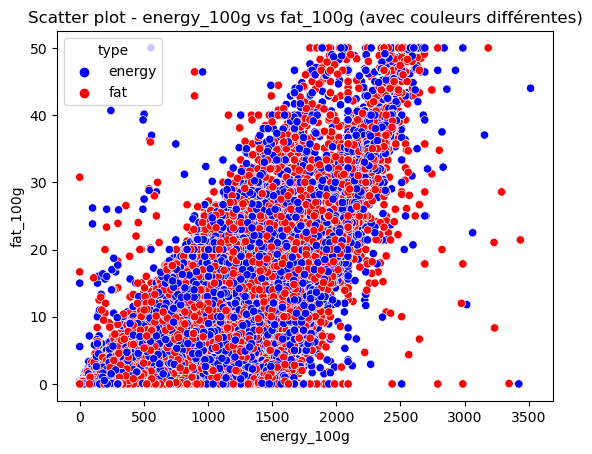

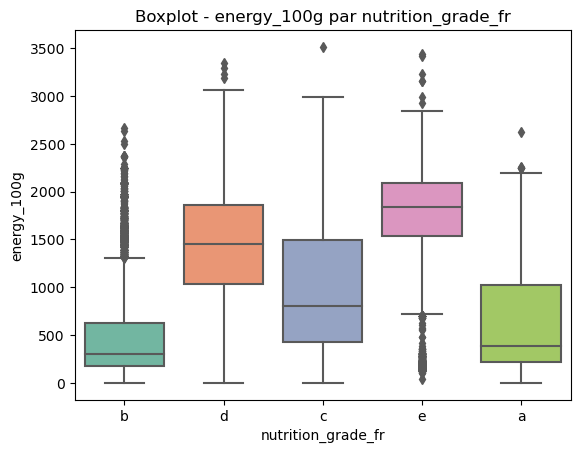

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajouter une colonne 'type' pour distinguer 'energy_100g' et 'fat_100g'
cleaned_data['type'] = ['energy' if i % 2 == 0 else 'fat' for i in range(len(cleaned_data))]

# Scatter plot entre 'energy_100g' et 'fat_100g' avec des couleurs distinctes
sns.scatterplot(
    x=cleaned_data['energy_100g'], 
    y=cleaned_data['fat_100g'],
    hue=cleaned_data['type'],  # Differencier les points par 'type'
    palette={"energy": "blue", "fat": "red"}  # Couleurs spécifiques pour chaque type
)
plt.title("Scatter plot - energy_100g vs fat_100g (avec couleurs différentes)")
plt.show()

# Boxplot pour une variable catégorielle avec deux couleurs
sns.boxplot(
    x=cleaned_data['nutrition_grade_fr'], 
    y=cleaned_data['energy_100g'], 
    palette="Set2"  # Palette différente pour les couleurs
)
plt.title("Boxplot - energy_100g par nutrition_grade_fr")
plt.show()

# analyse des colonnes nutrition_grade_fr et nutrition-score-fr_100g 

In [77]:
# afficher les deux colonne :
df[['nutrition_grade_fr' , 'nutrition-score-fr_100g']]

,nutrition_grade_fr,nutrition-score-fr_100g
0,NaN,NaN
1,d,14.0
2,b,0.0
3,d,12.0
4,NaN,NaN
...,...,...
320767,NaN,NaN
320768,b,0.0
320769,NaN,NaN
320770,NaN,NaN


# On va vérrifier que les information sont bien concordante entre les deux colonne 

In [78]:
# Définir les conditions basées sur les règles données
conditions = [
    (df['nutrition-score-fr_100g'] <= 2),            # a : score ≤ 2
    (df['nutrition-score-fr_100g'].between(3, 10)),   # b : score entre 3 et 10
    (df['nutrition-score-fr_100g'].between(11, 18)),  # c : score entre 11 et 18
    (df['nutrition-score-fr_100g'].between(19, 40)),  # d : score entre 19 et 40
    (df['nutrition-score-fr_100g'] > 40)              # e : score > 40
]

# Correspondance des grades nutritionnels attendus en fonction des scores
grades = ['a', 'b', 'c', 'd', 'e']

# Appliquer les conditions et créer une nouvelle colonne 'expected_grade' pour les grades attendus
df['expected_grade'] = pd.Series([''] * len(df))  # Initialiser une colonne vide

# Appliquer les conditions pour assigner les grades
for condition, grade in zip(conditions, grades):
    df.loc[condition, 'expected_grade'] = grade

# Gérer explicitement les valeurs manquantes (NaN) dans 'nutrition-score-fr_100g'
df.loc[pd.isna(df['nutrition-score-fr_100g']), 'expected_grade'] = np.NaN

# Comparer les colonnes 'nutrition_grade_fr' et 'expected_grade' pour identifier les valeurs aberrantes
df['is_aberrant'] = df['nutrition_grade_fr'] != df['expected_grade']

# Filtrer et afficher les lignes avec des valeurs aberrantes
aberrant_rows = df[df['is_aberrant']]

"Valeurs aberrantes:"
aberrant_rows


,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,expected_grade,is_aberrant
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,France,NaN,NaN,0,NaN,NaN,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),15,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,d,"A compléter,Informations nutritionnelles compl...",2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,c,True
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),22,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,b,"A compléter,Informations nutritionnelles compl...",1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,a,True
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),12,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,d,"A compléter,Informations nutritionnelles compl...",2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,c,True
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,États-Unis,Organic polenta,35 g (0.25 cup),2,[ organic-polenta -> en:organic-polenta ] [...,0.0,NaN,"A compléter,Informations nutritionnelles compl...",1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,2017-03-27T16:14:59Z,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,Roumanie,NaN,NaN,0,NaN,NaN,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,2017-03-09T11:31:16Z,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,États-Unis,"Organic peppermint, organic lemon grass, organ...",20 g (0.7 oz),7,[ organic-peppermint -> en:organic-peppermint...,0.0,b,"A compléter,Informations nutritionnelles compl...",0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,a,True
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,2015-01-24T11:36:17Z,2017-04-03T18:34:59Z,乐吧泡菜味薯片,乐吧,Chine,NaN,NaN,0,NaN,NaN,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,2017-04-16T10:54:49Z,2017-04-16T10:54:49Z,Tomates aux Vermicelles,Knorr,France,NaN,NaN,0,NaN,NaN,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


# à premiere vu 284965 valeurs sont concidérer comme non-concordante ! 
c'est beaucoup 

In [79]:
aberrant_rows[['nutrition_grade_fr' , 'nutrition-score-fr_100g' , 'expected_grade' , 'is_aberrant' ]]

,nutrition_grade_fr,nutrition-score-fr_100g,expected_grade,is_aberrant
0,NaN,NaN,NaN,True
1,d,14.0,c,True
2,b,0.0,a,True
3,d,12.0,c,True
4,NaN,NaN,NaN,True
...,...,...,...,...
320767,NaN,NaN,NaN,True
320768,b,0.0,a,True
320769,NaN,NaN,NaN,True
320770,NaN,NaN,NaN,True


# on voir les valeurs qui sont réelement des erreurs et non pas des données manquantes :  

In [80]:
# Filtrer les lignes avec des valeurs aberrantes
aberrant_rows = df[df['is_aberrant']]

# Supprimer les lignes où 'nutrition_grade_fr' ou 'expected_grade' contient des NaN
aberrant_rows_clean = aberrant_rows.dropna(subset=['nutrition_grade_fr', 'expected_grade'])

# Afficher les lignes aberrantes sans NaN
"Valeurs aberrantes sans NaN :"
aberrant_rows_clean

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,expected_grade,is_aberrant
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),15,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,d,"A compléter,Informations nutritionnelles compl...",2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000000,14.0,c,True
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),22,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,b,"A compléter,Informations nutritionnelles compl...",1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250000,0.0,a,True
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),12,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,d,"A compléter,Informations nutritionnelles compl...",2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482000,12.0,c,True
7,16124,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09T10:35:11Z,2017-03-09T10:35:12Z,Organic Muesli,Daddy's Muesli,États-Unis,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),101,[ org-oats -> en:org-oats ] [ oats -> en:oa...,0.0,c,"A compléter,Informations nutritionnelles compl...",1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055000,7.0,b,True
12,16872,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09T10:34:10Z,2017-03-09T10:34:11Z,Zen Party Mix,Sunridge,États-Unis,"Roasted peanuts (peanuts, peanut or canola oil...",30 g (0.25 cup),52,[ roasted-peanuts -> en:roasted-peanuts ] [...,0.0,d,"A compléter,Informations nutritionnelles compl...",2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633000,12.0,c,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320740,9782211109758,http://world-fr.openfoodfacts.org/produit/9782...,kiliweb,2017-03-08T20:05:58Z,2017-03-08T20:05:58Z,Verrine Cheescake Myrtille,Kayser,France,NaN,NaN,0,NaN,NaN,d,"A compléter,Informations nutritionnelles compl...",1084.0,NaN,12.00,NaN,10.50,0.0,8.70,0.29000,0.114173,16.0,c,True
320741,9782401029101,http://world-fr.openfoodfacts.org/produit/9782...,kiliweb,2017-04-06T19:47:01Z,2017-04-06T19:47:01Z,Fiche Brevet,Hatier,France,NaN,NaN,0,NaN,NaN,b,"A compléter,Informations nutritionnelles compl...",4.0,NaN,1.00,NaN,1.00,10.0,10.00,10.00000,3.937008,0.0,a,True
320757,9900000000233,http://world-fr.openfoodfacts.org/produit/9900...,kiliweb,2017-04-01T20:52:18Z,2017-04-01T20:52:19Z,Amandes,Biosic,France,NaN,NaN,0,NaN,NaN,b,"A compléter,Informations nutritionnelles compl...",2406.0,NaN,3.73,NaN,3.89,12.2,21.22,0.10000,0.039370,0.0,a,True
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,balooval,2013-04-28T15:30:39Z,2013-06-20T01:09:16Z,Thé vert Earl grey,Lobodis,France,"thé vert, arôme naturel bergamote avec autres ...",NaN,14,[ the-vert -> fr:the-vert ] [ the -> fr:the...,0.0,c,"A vérifier,Complet,Informations nutritionnelle...",21.0,0.20,0.20,0.50,0.50,0.2,0.50,0.02540,0.010000,2.0,a,True


# le métier : on va se fier à la colonne nutrition score pour mettre a jour nutrition grade 

In [81]:
# Mettre à jour la colonne nutrition_grade_fr pour qu'elle corresponde aux valeurs attendues
df['nutrition_grade_fr'] = df['expected_grade']
aberrant_rows[['nutrition_grade_fr' , 'nutrition-score-fr_100g' , 'expected_grade' , 'is_aberrant' ]]


,nutrition_grade_fr,nutrition-score-fr_100g,expected_grade,is_aberrant
0,NaN,NaN,NaN,True
1,d,14.0,c,True
2,b,0.0,a,True
3,d,12.0,c,True
4,NaN,NaN,NaN,True
...,...,...,...,...
320767,NaN,NaN,NaN,True
320768,b,0.0,a,True
320769,NaN,NaN,NaN,True
320770,NaN,NaN,NaN,True


# Traitement des données manquantes : 

In [82]:
# Vérifier si 'df' est bien un df
# Et créer un df avec les colonnes sélectionnées
colonnes_a_garder = ['code','ingredients_from_palm_oil_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 
                     'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']

df_stat = df[colonnes_a_garder]  # Sélection des colonnes avec des crochets


In [83]:
df_stat.columns 


Index(['code', 'ingredients_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [84]:
# Évaluer les Données Manquantes : 
# Pourcentage de données manquantes par colonne
missing_percentage = df_stat.isnull().mean() * 100
print(missing_percentage)


code                            0.007174
ingredients_from_palm_oil_n    22.403139
energy_100g                    18.607937
fat_100g                       23.978365
saturated-fat_100g             28.420189
carbohydrates_100g             24.073502
sugars_100g                    23.613100
fiber_100g                     37.359049
proteins_100g                  18.976946
salt_100g                      20.355346
sodium_100g                    20.370006
nutrition-score-fr_100g        31.020403
dtype: float64


<Axes: >

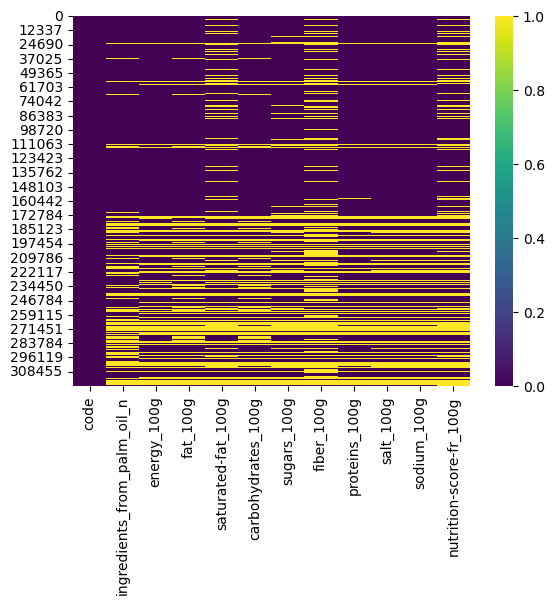

In [85]:
sns.heatmap(df_stat.isnull(),cmap='viridis')

# comment jeux peux renseigner ces valeurs manquantres :  
    deja les valeur manquantes sont numérique : 
        remplacer par la médianne 
        utiliser Knnimuter 
        utiliser IterativeImputer

# Échantillonnage et Introduction de Valeurs Manquantes

In [86]:
# Échantillonnage de 50 % du DataFrame
df_sampled = df_stat.sample(frac=0.5, random_state=42)

# Introduire des valeurs manquantes (par exemple, 10 % aléatoirement)
np.random.seed(42)  # Pour la reproductibilité
missing_mask = np.random.rand(*df_sampled.shape) < 0.1  # 10 % de valeurs manquantes
df_with_missing = df_sampled.mask(missing_mask)

# Afficher les premières lignes du DataFrame avec des valeurs manquantes
print(df_with_missing.head())


                 code  ingredients_from_palm_oil_n  energy_100g  fat_100g  \
234039  3452200004048                          0.0       1048.0      0.20   
209812  3256220657808                          NaN          NaN       NaN   
7147      11161159025                          0.0       1163.0      1.39   
167829   863441000004                          NaN        854.0     13.27   
193563  3095757287016                          NaN          NaN       NaN   

        saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
234039                0.05                60.0          NaN         1.5   
209812                 NaN                 NaN          NaN         NaN   
7147                  0.00                 NaN         2.78        25.0   
167829                7.08                 0.0          NaN         0.0   
193563                 NaN                 NaN          NaN         NaN   

        proteins_100g  salt_100g  sodium_100g  nutrition-score-fr_100g  
234039       

# Imputation par Médiane

In [87]:
# Imputation par Médiane
imputer_median = SimpleImputer(strategy='median')
df_filled_median = pd.DataFrame(imputer_median.fit_transform(df_with_missing), columns=df_with_missing.columns)

# Afficher les premières lignes des données imputées par Médiane
print(df_filled_median.head())


           code  ingredients_from_palm_oil_n  energy_100g  fat_100g  \
0  3.452200e+12                          0.0       1048.0      0.20   
1  3.256221e+12                          0.0       1100.0      5.00   
2  1.116116e+10                          0.0       1163.0      1.39   
3  8.634410e+11                          0.0        854.0     13.27   
4  3.095757e+12                          0.0       1100.0      5.00   

   saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
0                0.05              60.000         5.66         1.5   
1                1.79              20.745         5.66         1.5   
2                0.00              20.745         2.78        25.0   
3                7.08               0.000         5.66         0.0   
4                1.79              20.745         5.66         1.5   

   proteins_100g  salt_100g  sodium_100g  nutrition-score-fr_100g  
0           0.50     0.0500        0.231                     10.0  
1           4.76

# Imputation Itérative

In [88]:
# Imputation itérative
imputer_iterative = IterativeImputer(max_iter=10, random_state=42)
df_filled_iterative = pd.DataFrame(imputer_iterative.fit_transform(df_with_missing), columns=df_with_missing.columns)

# Afficher les premières lignes des données imputées de manière itérative
print(df_filled_iterative.head())



           code  ingredients_from_palm_oil_n  energy_100g  fat_100g  \
0  3.452200e+12                     0.000000  1048.000000   0.20000   
1  3.256221e+12                     0.019955  1132.464824  13.06317   
2  1.116116e+10                     0.000000  1163.000000   1.39000   
3  8.634410e+11                    -0.004875   854.000000  13.27000   
4  3.095757e+12                     0.019955  1132.464824  13.06317   

   saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
0            0.050000           60.000000    34.862836    1.500000   
1            4.918106           32.550389    15.863144    2.580619   
2            0.000000           57.647014     2.780000   25.000000   
3            7.080000            0.000000    -9.504008    0.000000   
4            4.918106           32.550389    15.863144    2.580619   

   proteins_100g  salt_100g  sodium_100g  nutrition-score-fr_100g  
0       0.500000   0.050000     0.020285                10.000000  
1       7.091141

# Imputation KNN

In [93]:
# Importation des bibliothèques nécessaires
from sklearn.impute import KNNImputer
import pandas as pd

# Créer l'imputer KNN avec n_neighbors = 5
imputer_knn = KNNImputer(n_neighbors=5)

# Afficher le nombre de valeurs manquantes avant l'imputation
missing_before = df_with_missing.isnull().sum().sum()
print(f"Nombre total de valeurs manquantes avant l'imputation : {missing_before}")

# Définir la taille des morceaux pour afficher la progression
n_rows = df_with_missing.shape[0]
chunk_size = 1000  # Par exemple, on traite 1000 lignes à la fois

# Initialiser un DataFrame pour stocker les résultats imputés
df_filled_knn = df_with_missing.copy()

# Imputer l'ensemble des données avec fit_transform d'abord pour ajuster l'imputer
print("Ajustement de l'imputer sur les données et imputation en cours...")

# Applique fit_transform sur l'ensemble des données pour que l'imputer soit ajusté
imputer_knn.fit(df_with_missing)

# Imputation en morceaux et afficher la progression
for i in range(0, n_rows, chunk_size):
    # Afficher l'avancement pour chaque morceau de données imputé
    print(f"Traitement des lignes {i+1} à {min(i+chunk_size, n_rows)}...")
    
    # Imputer le "morceau" de données avec la méthode transform
    df_filled_knn.iloc[i:i+chunk_size, :] = imputer_knn.transform(df_with_missing.iloc[i:i+chunk_size, :])

# Afficher les premières lignes des données imputées
print("\nDonnées imputées par KNN (premières lignes) :")
print(df_filled_knn.head())

# Afficher le nombre de valeurs manquantes après l'imputation
missing_after = df_filled_knn.isnull().sum().sum()
print(f"\nNombre total de valeurs manquantes après l'imputation : {missing_after}")


Nombre total de valeurs manquantes avant l'imputation : 579656
Ajustement de l'imputer sur les données et imputation en cours...
Traitement des lignes 1 à 1000...
Traitement des lignes 1001 à 2000...
Traitement des lignes 2001 à 3000...
Traitement des lignes 3001 à 4000...
Traitement des lignes 4001 à 5000...
Traitement des lignes 5001 à 6000...
Traitement des lignes 6001 à 7000...
Traitement des lignes 7001 à 8000...
Traitement des lignes 8001 à 9000...
Traitement des lignes 9001 à 10000...
Traitement des lignes 10001 à 11000...
Traitement des lignes 11001 à 12000...
Traitement des lignes 12001 à 13000...
Traitement des lignes 13001 à 14000...
Traitement des lignes 14001 à 15000...
Traitement des lignes 15001 à 16000...
Traitement des lignes 16001 à 17000...
Traitement des lignes 17001 à 18000...
Traitement des lignes 18001 à 19000...
Traitement des lignes 19001 à 20000...
Traitement des lignes 20001 à 21000...
Traitement des lignes 21001 à 22000...
Traitement des lignes 22001 à 23000

In [95]:
# Vérifier s'il y a des NaN dans le DataFrame
has_nan = df_filled_median.isna().sum().sum() > 0

if has_nan:
    print("Il y a des NaN dans le DataFrame.")
else:
    print("Il n'y a pas de NaN dans le DataFrame.")


Il n'y a pas de NaN dans le DataFrame.


In [96]:
# Vérifier s'il y a des NaN dans le DataFrame
has_nan = df_filled_knn.isna().sum().sum() > 0

if has_nan:
    print("Il y a des NaN dans le DataFrame.")
else:
    print("Il n'y a pas de NaN dans le DataFrame.")

Il n'y a pas de NaN dans le DataFrame.


In [97]:
# Vérifier s'il y a des NaN dans le DataFrame
has_nan = df_filled_iterative.isna().sum().sum() > 0

if has_nan:
    print("Il y a des NaN dans le DataFrame.")
else:
    print("Il n'y a pas de NaN dans le DataFrame.")

Il n'y a pas de NaN dans le DataFrame.


In [98]:
real_values = df_with_missing.copy()
real_values

,code,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
234039,3452200004048,0.0,1048.0,0.20,0.05,60.00,NaN,1.5,0.50,0.05000,NaN,10.0
209812,3256220657808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7147,11161159025,0.0,1163.0,1.39,0.00,NaN,2.78,25.0,NaN,0.00000,0.000000,-7.0
167829,863441000004,NaN,854.0,13.27,7.08,0.00,NaN,0.0,19.47,0.19050,0.075000,4.0
193563,3095757287016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
17264,21130108060,0.0,883.0,8.55,3.29,21.05,1.32,1.3,12.50,1.03632,0.408000,3.0
217837,3266140059743,0.0,1132.0,2.50,0.70,50.60,1.50,NaN,9.40,0.05000,0.019685,-2.0
61433,50400739697,0.0,1100.0,NaN,0.00,52.63,7.02,1.8,8.77,1.29286,0.509000,2.0
95217,77890404812,0.0,1644.0,17.86,4.46,50.00,NaN,3.6,5.36,0.77216,0.304000,11.0


In [99]:
# Comparer toutes les valeurs réelles avec les valeurs imputées
comparison_df = pd.DataFrame({
    'Code': real_values['code'],  # Garder la colonne code pour référence
    'Real Values (ingredients_from_palm_oil_n)': real_values['ingredients_from_palm_oil_n'],
    'Real Values (energy_100g)': real_values['energy_100g'],
    'Real Values (fat_100g)': real_values['fat_100g'],
    'Real Values (saturated-fat_100g)': real_values['saturated-fat_100g'],
    'Real Values (carbohydrates_100g)': real_values['carbohydrates_100g'],
    'Real Values (sugars_100g)': real_values['sugars_100g'],
    'Real Values (fiber_100g)': real_values['fiber_100g'],
    'Real Values (proteins_100g)': real_values['proteins_100g'],
    'Real Values (salt_100g)': real_values['salt_100g'],
    'Real Values (sodium_100g)': real_values['sodium_100g'],
    'Real Values (nutrition-score-fr_100g)': real_values['nutrition-score-fr_100g'],
    'Simple Imputed (energy_100g)': df_filled_median['energy_100g'],
    'KNN Imputed (energy_100g)': df_filled_knn['energy_100g'],
    'Iterative Imputed (energy_100g)': df_filled_iterative['energy_100g'],
})

# Afficher le DataFrame de comparaison
print("\nComparaison des valeurs réelles et des valeurs imputées :")
comparison_df.head(10)  # Afficher les 10 premières lignes


Comparaison des valeurs réelles et des valeurs imputées :


,Code,Real Values (ingredients_from_palm_oil_n),Real Values (energy_100g),Real Values (fat_100g),Real Values (saturated-fat_100g),Real Values (carbohydrates_100g),Real Values (sugars_100g),Real Values (fiber_100g),Real Values (proteins_100g),Real Values (salt_100g),Real Values (sodium_100g),Real Values (nutrition-score-fr_100g),Simple Imputed (energy_100g),KNN Imputed (energy_100g),Iterative Imputed (energy_100g)
0,3087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1048.0,1737.4,1048.000000
1,4530,0.0,2243.0,NaN,28.57,64.29,NaN,3.6,3.57,0.0000,0.000,14.0,1100.0,2243.0,1132.464824
2,NaN,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,NaN,0.6350,0.250,0.0,1163.0,1941.0,1163.000000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,854.0,NaN,854.000000
4,16094,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,1100.0,1552.0,1132.464824
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1470.0,NaN,1470.000000
6,16117,0.0,1490.0,NaN,NaN,80.00,NaN,NaN,NaN,NaN,NaN,NaN,3758.0,1490.0,3758.000000
7,16124,0.0,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.1397,0.055,7.0,1536.0,1833.0,1536.000000
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1100.0,NaN,927.444994
9,16513,0.0,3586.0,100.00,7.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1063.0,3586.0,1063.000000


In [100]:
comparison_df.columns 

Index(['Code', 'Real Values (ingredients_from_palm_oil_n)',
       'Real Values (energy_100g)', 'Real Values (fat_100g)',
       'Real Values (saturated-fat_100g)', 'Real Values (carbohydrates_100g)',
       'Real Values (sugars_100g)', 'Real Values (fiber_100g)',
       'Real Values (proteins_100g)', 'Real Values (salt_100g)',
       'Real Values (sodium_100g)', 'Real Values (nutrition-score-fr_100g)',
       'Simple Imputed (energy_100g)', 'KNN Imputed (energy_100g)',
       'Iterative Imputed (energy_100g)'],
      dtype='object')

In [101]:
comparison_df.shape 

(240535, 15)

In [102]:
# Vérifier les valeurs manquantes
print(real_values.isnull().sum())
print(df_filled_median.isnull().sum())
print(df_filled_knn.isnull().sum())
print(df_filled_iterative.isnull().sum())


code                           16022
ingredients_from_palm_oil_n    48488
energy_100g                    42685
fat_100g                       50558
saturated-fat_100g             56787
carbohydrates_100g             50714
sugars_100g                    50018
fiber_100g                     69830
proteins_100g                  43260
salt_100g                      45289
sodium_100g                    45291
nutrition-score-fr_100g        60714
dtype: int64
code                           0
ingredients_from_palm_oil_n    0
energy_100g                    0
fat_100g                       0
saturated-fat_100g             0
carbohydrates_100g             0
sugars_100g                    0
fiber_100g                     0
proteins_100g                  0
salt_100g                      0
sodium_100g                    0
nutrition-score-fr_100g        0
dtype: int64
code                           0
ingredients_from_palm_oil_n    0
energy_100g                    0
fat_100g                       0
sa

In [103]:
# Remplacer les NaN par 0 ou 1 dans le DataFrame
real_values.fillna(0, inplace=True)  # Remplacer par 0
# ou
# real_values.fillna(1, inplace=True)  # Remplacer par 1


In [104]:
# Supposons que real_values, df_filled_median, df_filled_knn, df_filled_iterative sont déjà définis

# Initialiser une liste pour stocker les résultats
results_list = []

# Liste des méthodes d'imputation et leurs DataFrames associés
methods = {
    'Median Imputation': df_filled_median,
    'KNN Imputation': df_filled_knn,
    'Iterative Imputation': df_filled_iterative
}

# Calculer les métriques pour chaque méthode
for method_name, df_imputed in methods.items():
    # Calculer R²
    r2 = r2_score(real_values['energy_100g'], df_imputed['energy_100g'])
    
    # Calculer RMSE
    rmse = np.sqrt(mean_squared_error(real_values['energy_100g'], df_imputed['energy_100g']))
    
    # Calculer AME
    ame = mean_absolute_error(real_values['energy_100g'], df_imputed['energy_100g'])
    
    # Ajouter les résultats à la liste
    results_list.append({
        'Imputation Method': method_name,
        'R²': r2,
        'RMSE': rmse,
        'AME': ame
    })

# Convertir la liste en DataFrame
results = pd.DataFrame(results_list)

# Afficher les résultats
print("Évaluation des méthodes d'imputation :")
print(results)


Évaluation des méthodes d'imputation :
      Imputation Method         R²         RMSE         AME
0     Median Imputation   0.682478   567.638305  292.921132
1        KNN Imputation   0.586417   647.837136  295.317954
2  Iterative Imputation -22.904974  4925.254775  313.838946


# analyse des distribution des données originales et celle aprés la completion pour la méthode KNN: 

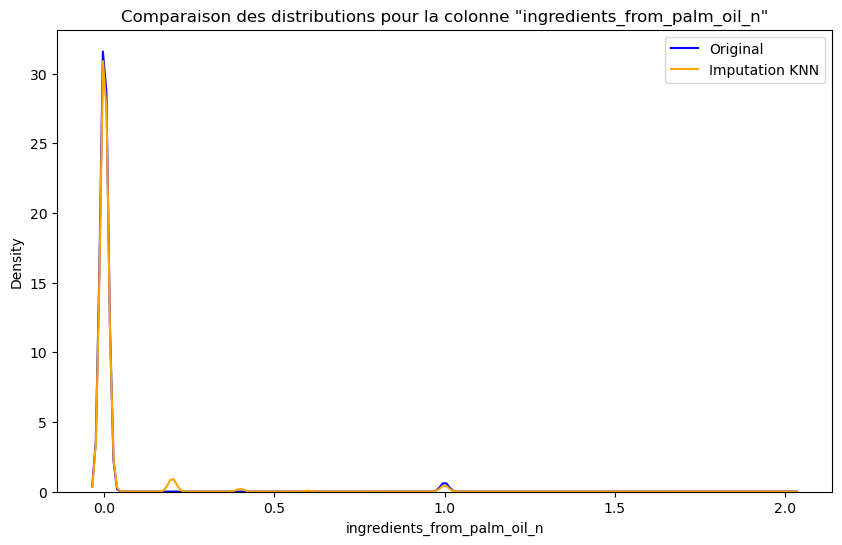

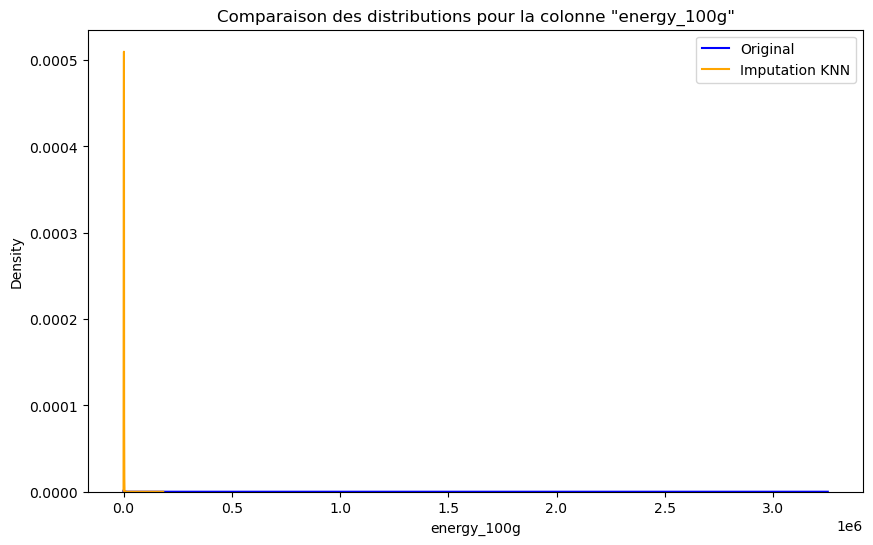

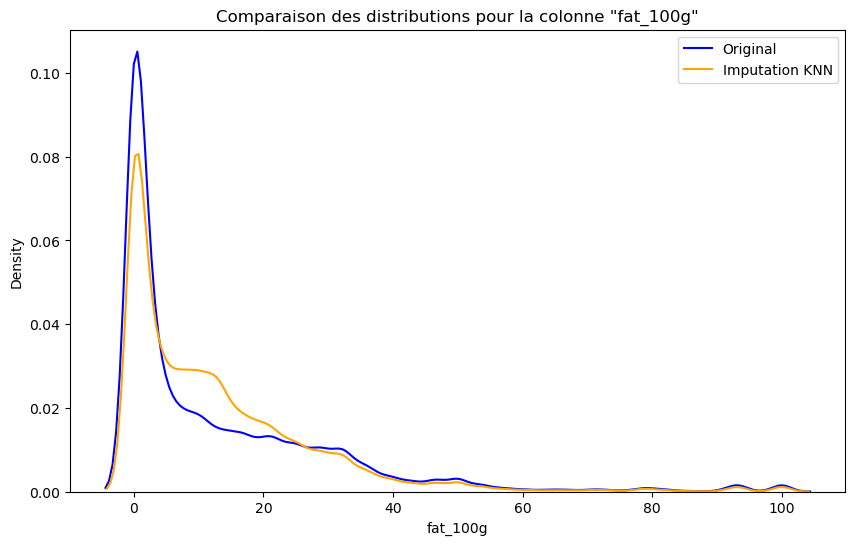

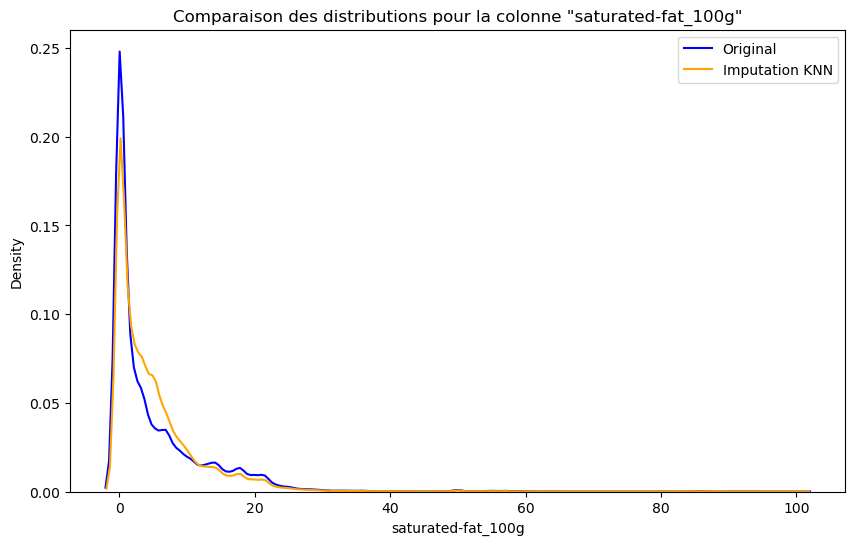

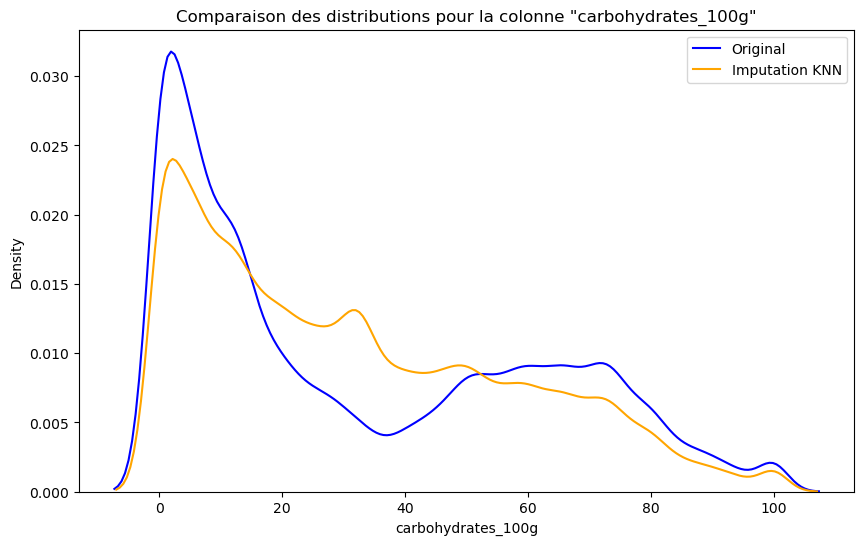

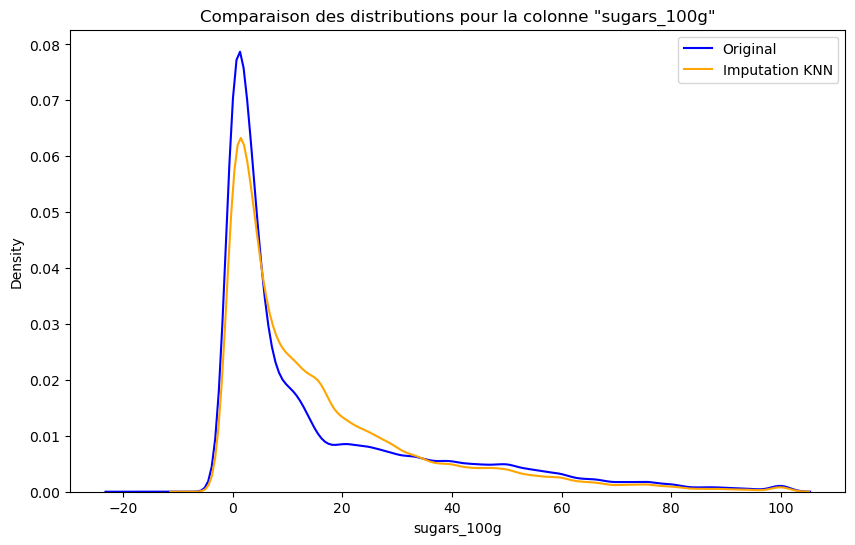

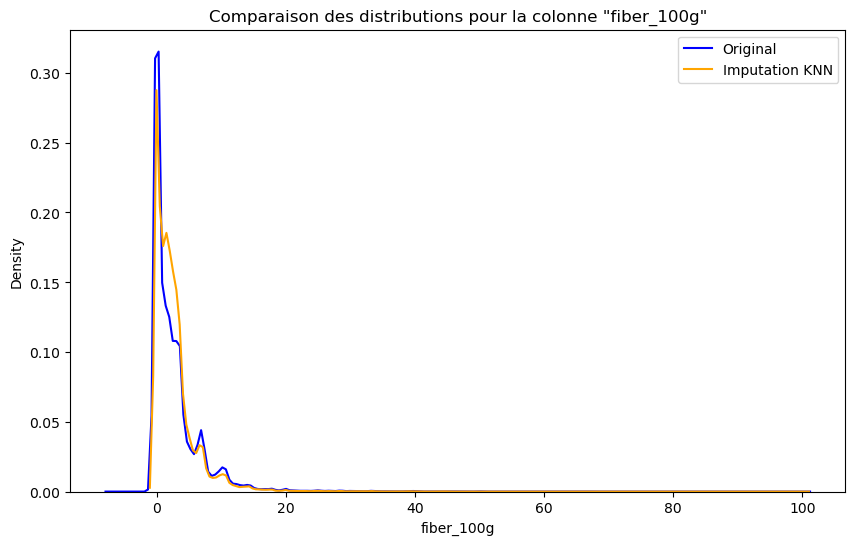

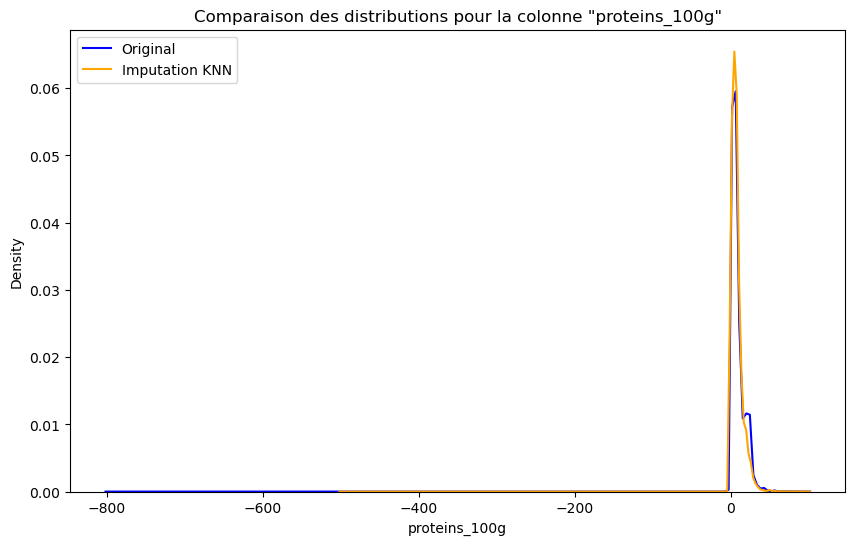

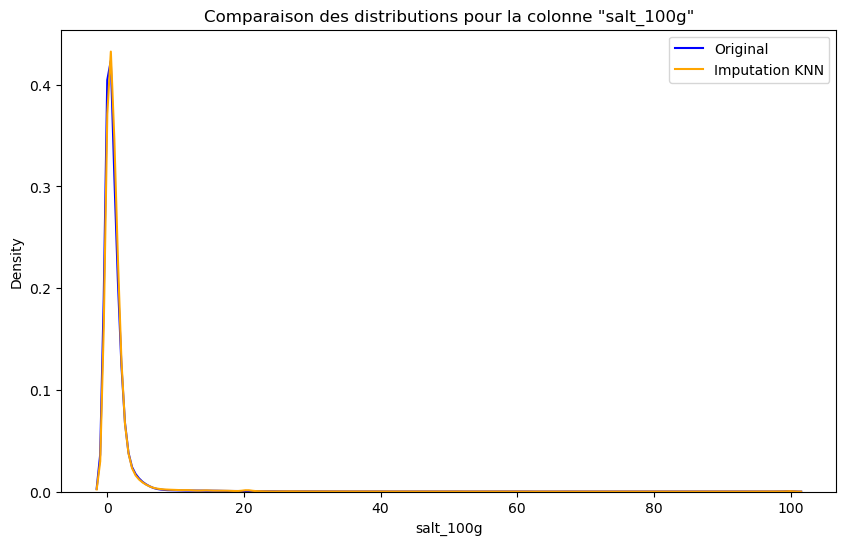

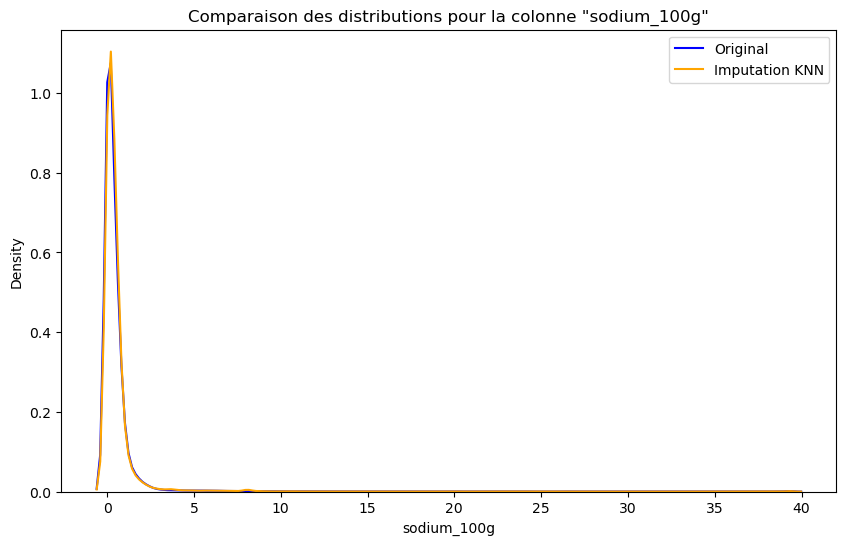

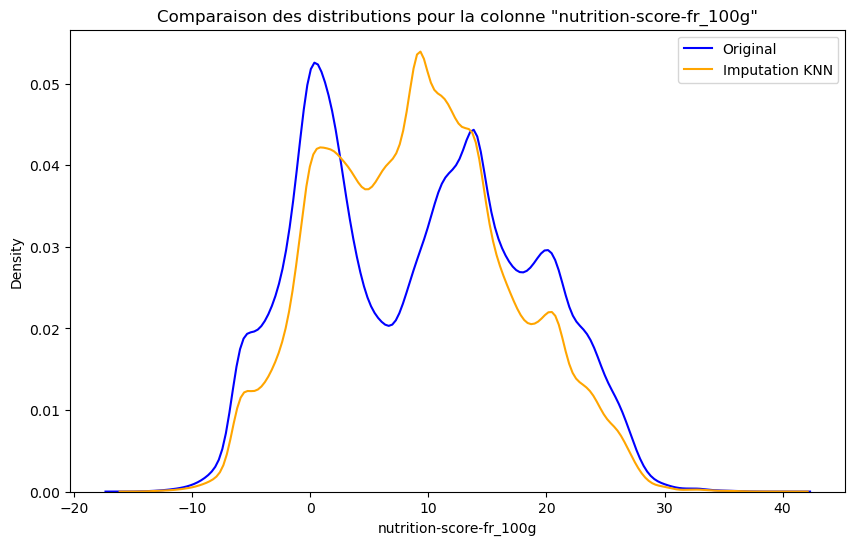

In [105]:
#Code pour les KDE plots pour plusieurs colonnes :

# Liste des colonnes à comparer (sans 'code')
columns_to_compare = ['ingredients_from_palm_oil_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 
                     'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 
                      'sodium_100g', 'nutrition-score-fr_100g']

for column in columns_to_compare:
    plt.figure(figsize=(10, 6))
    
    # KDE plot pour la distribution des données originales
    sns.kdeplot(df_stat[column].dropna(), label='Original', color='blue')
    
    # KDE plot pour la distribution après imputation KNN
    sns.kdeplot(df_filled_knn[column], label='Imputation KNN', color='orange')
    

    
    # Configuration des labels et légendes
    plt.legend()
    plt.title(f'Comparaison des distributions pour la colonne "{column}"')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


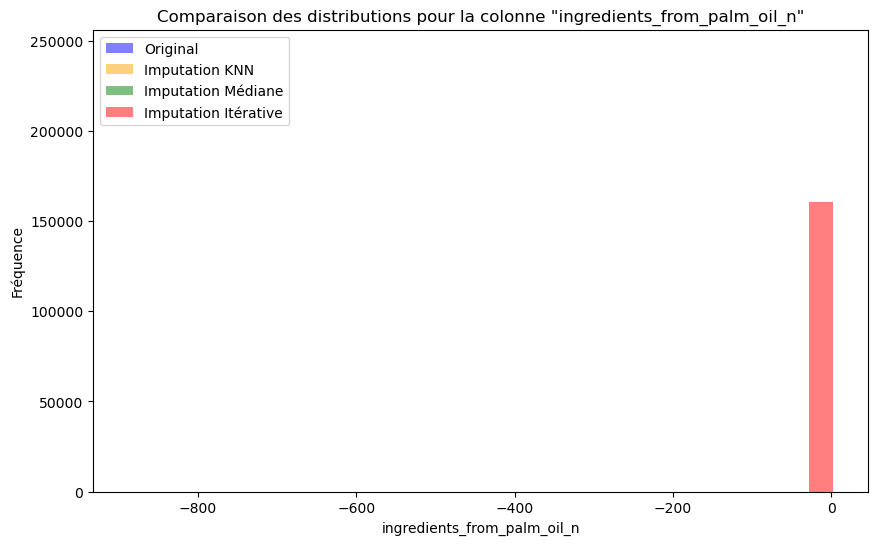

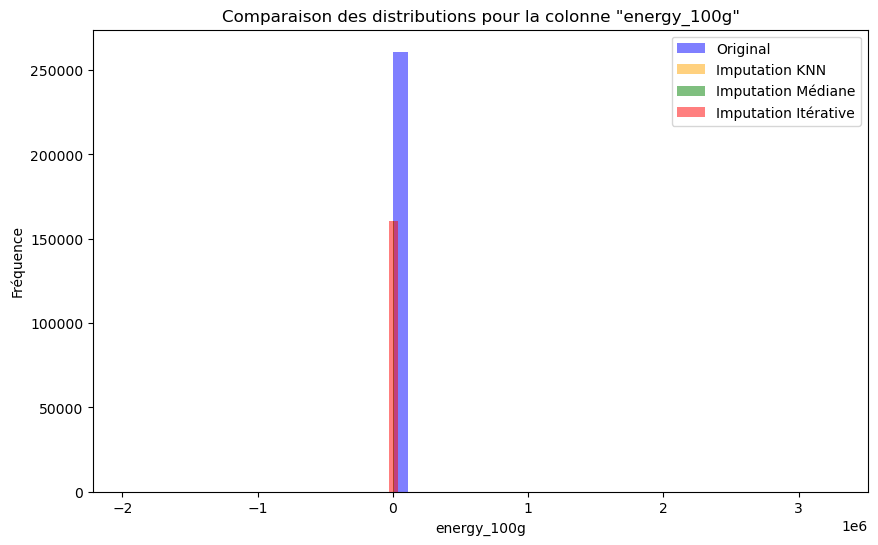

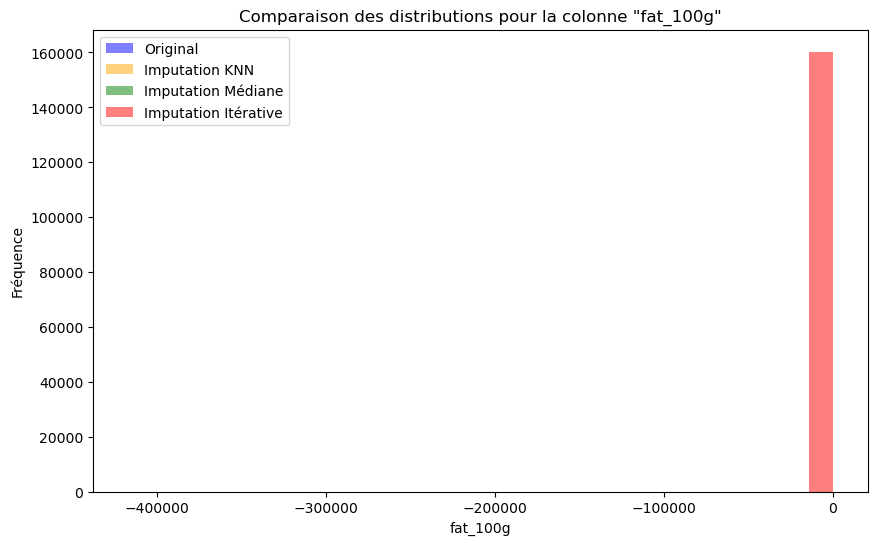

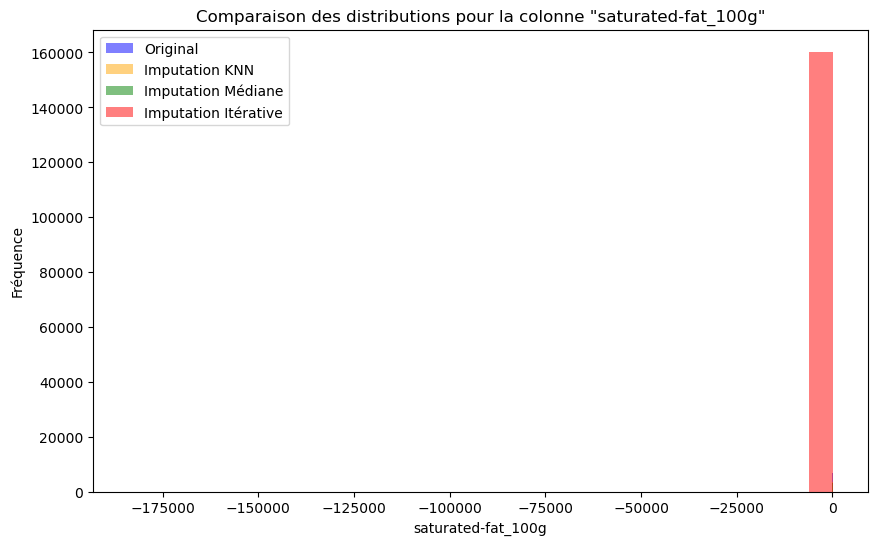

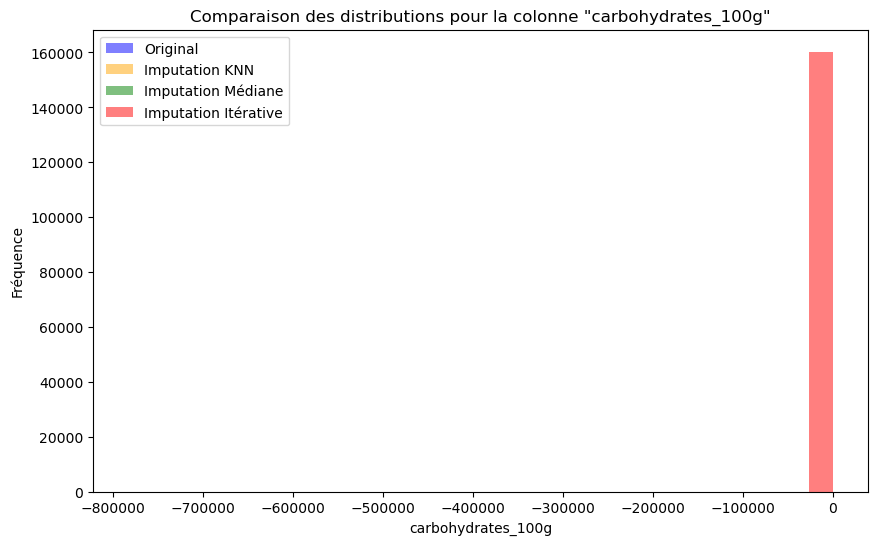

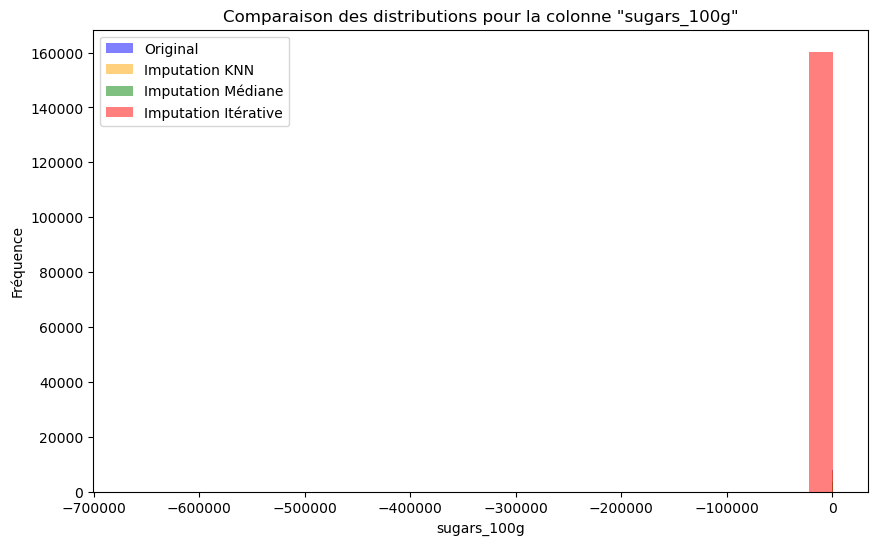

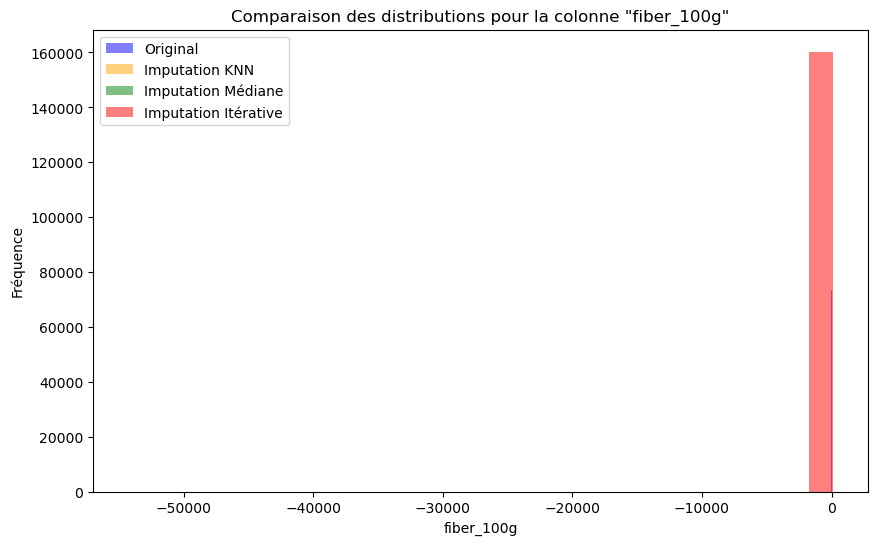

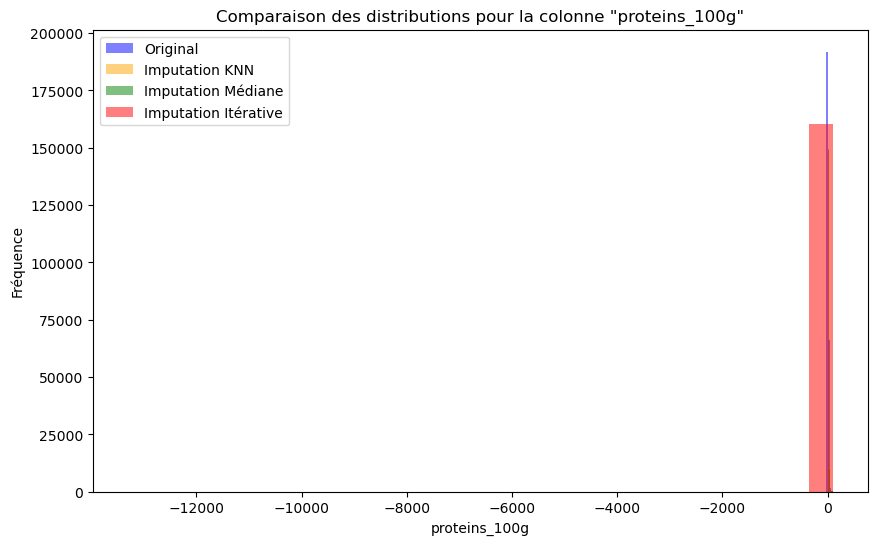

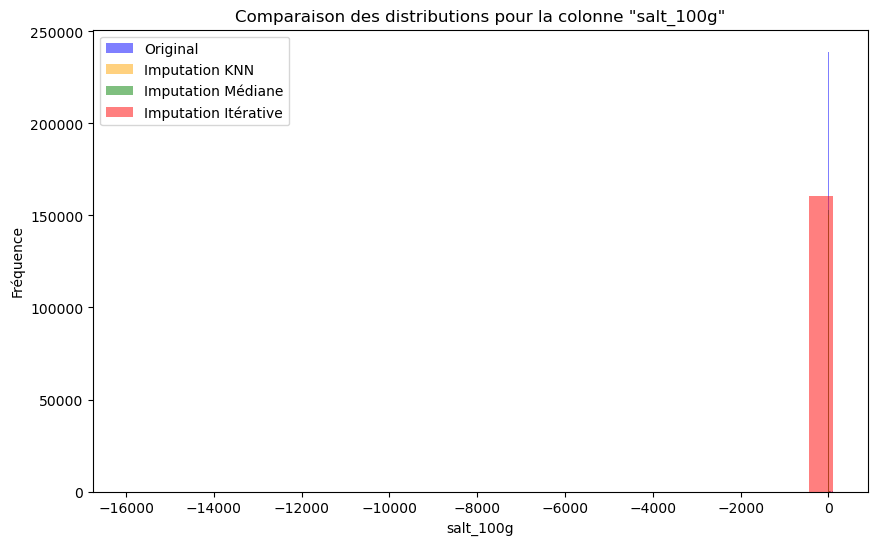

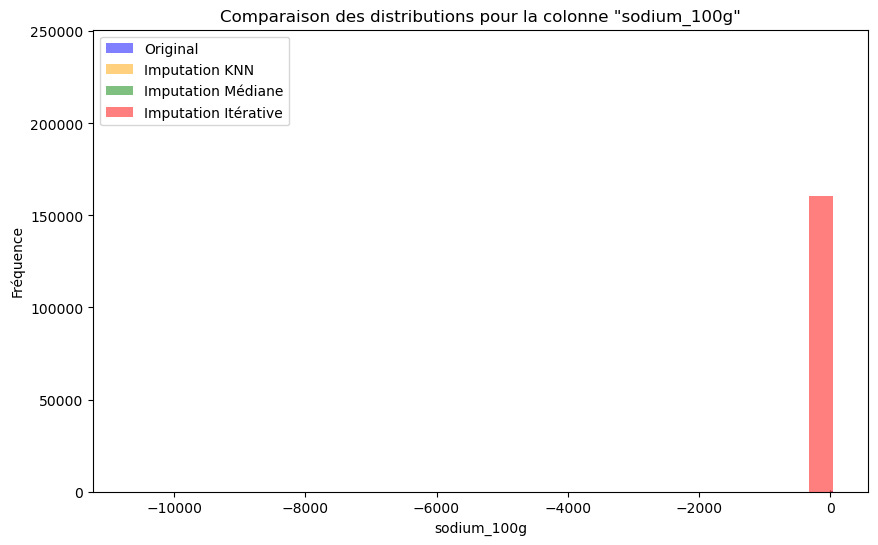

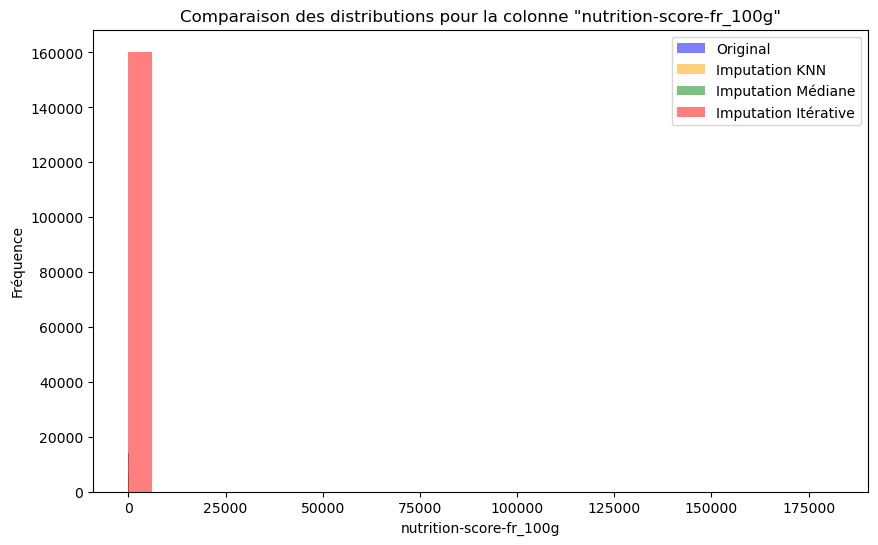

In [106]:
# Code pour les histogrammes pour plusieurs colonnes :
for column in columns_to_compare:
    plt.figure(figsize=(10, 6))

    # Histogramme des données originales
    plt.hist(df_stat[column].dropna(), bins=30, alpha=0.5, label='Original', color='blue')

    # Histogramme après imputation KNN
    plt.hist(df_filled_knn[column], bins=30, alpha=0.5, label='Imputation KNN', color='orange')

    # Histogramme après imputation Médiane
    plt.hist(df_filled_median[column], bins=30, alpha=0.5, label='Imputation Médiane', color='green')

    # Histogramme après imputation itérative
    plt.hist(df_filled_iterative[column], bins=30, alpha=0.5, label='Imputation Itérative', color='red')

    # Configuration des labels et légendes
    plt.legend()
    plt.title(f'Comparaison des distributions pour la colonne "{column}"')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.show()


# Normalisation des données

In [107]:
df_filled_knn = df_filled_knn

In [108]:
# Sélection des colonnes numériques à inclure dans l'ACP
columns_to_scale = ['ingredients_from_palm_oil_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 
                    'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 
                    'sodium_100g', 'nutrition-score-fr_100g']

# Normalisation des données avec StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filled_knn[columns_to_scale])

# Création d'un DataFrame des données normalisées
df_scaled = pd.DataFrame(df_scaled, columns=columns_to_scale)
df_scaled.head()


,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,-0.180516,-0.082978,-0.819943,-0.734539,1.106536,-0.149592,-0.334122,-0.882081,-0.270278,1.198256,0.127460
1,-0.180516,-0.096586,-0.021459,-0.087344,0.064399,-0.797025,-0.503883,-0.242431,0.607827,-0.056961,0.075983
2,-0.180516,0.041224,-0.742566,-0.741844,-0.172691,-0.696648,5.899303,-0.364764,-0.279114,-0.278765,-2.060340
3,-0.180516,-0.292501,0.029909,0.292500,-1.230094,0.292280,-0.732000,1.645870,-0.245448,-0.245068,-0.644704
4,-0.180516,-0.707227,-0.702902,-0.639578,-1.193487,-0.792753,-0.705475,2.009671,-0.010494,-0.009894,-0.824876


# Analyse en Composantes Principales (ACP)

In [109]:
# Initialisation de l'ACP (on garde toutes les composantes pour l'instant)
pca = PCA(n_components=len(columns_to_scale))

# Calcul de l'ACP
pca_result = pca.fit_transform(df_scaled)

# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_

# Affichage de la variance expliquée
print("Variance expliquée par chaque composante :", explained_variance)

# Création d'un DataFrame avec les résultats de l'ACP
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(len(columns_to_scale))])
pca_df.head()


Variance expliquée par chaque composante : [0.23930655 0.17331529 0.15104919 0.11131566 0.08888273 0.0704337
 0.05536106 0.03672758 0.033076   0.02994554 0.01058671]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.686341,0.203393,1.455603,-0.078014,-0.174828,-0.026168,0.526068,0.481785,0.778569,-0.199650,-1.043792
1,-0.400622,0.452179,-0.201630,-0.355591,-0.127865,-0.020268,0.406388,0.370280,0.506193,-0.238118,0.465326
2,-1.271557,-0.989406,-0.236444,5.036624,0.416161,3.134216,-1.381816,-0.186936,0.227554,0.987133,0.016462
3,-0.328210,-0.036065,-1.353199,-0.186723,-0.141236,-1.250336,-0.329772,-0.355804,-1.312173,0.261375,0.005337
4,-1.591718,0.201763,-1.556119,0.345646,0.080035,-1.797012,-0.098949,-0.190321,-0.524573,0.183730,0.001346


# Visualisation de la variance expliquée par les composantes principales

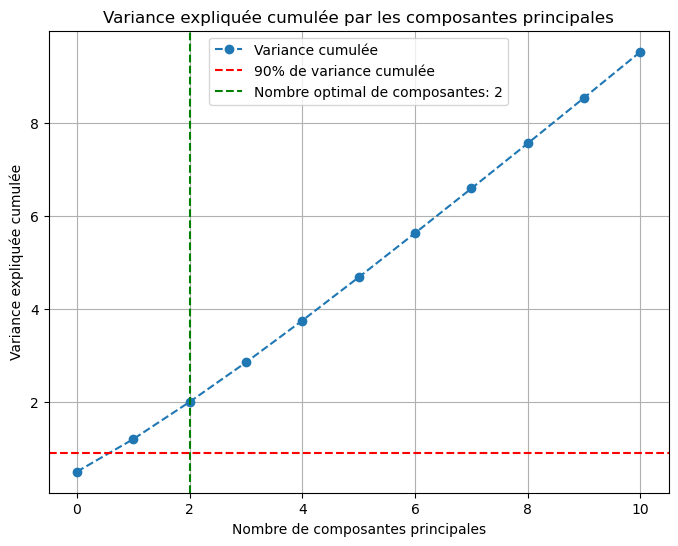

In [125]:
# Visualisation de la variance expliquée cumulée
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', label='Variance cumulée')
plt.title('Variance expliquée cumulée par les composantes principales')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.grid(True)

# Ligne horizontale pour 90% de la variance cumulée
plt.axhline(y=0.9, color='r', linestyle='--', label='90% de variance cumulée')

# Identifier le nombre optimal de composantes (première composante où la variance cumulée atteint 90%)
n_components_optimal = np.argmax(np.cumsum(explained_variance) >= 0.9) + 1  # +1 car l'index commence à 0

# Ligne verticale pour le nombre optimal de composantes
plt.axvline(x=n_components_optimal, color='g', linestyle='--', label=f'Nombre optimal de composantes: {n_components_optimal}')

# Légende
plt.legend()

# Affichage du graphique
plt.show()

# Création d'un DataFrame avec les résultats de l'ACP
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(len(columns_to_scale))])

# Choix du nombre de composantes principales

In [126]:
# Choisir le nombre de composantes en fonction de la variance expliquée (par exemple 80%)
n_composantes = np.argmax(np.cumsum(explained_variance) >= 0.90) + 1
print(f"Nombre optimal de composantes principales à conserver : {n_composantes}")


Nombre optimal de composantes principales à conserver : 2


# KMeans sur les composantes principales

C:\Users\mario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

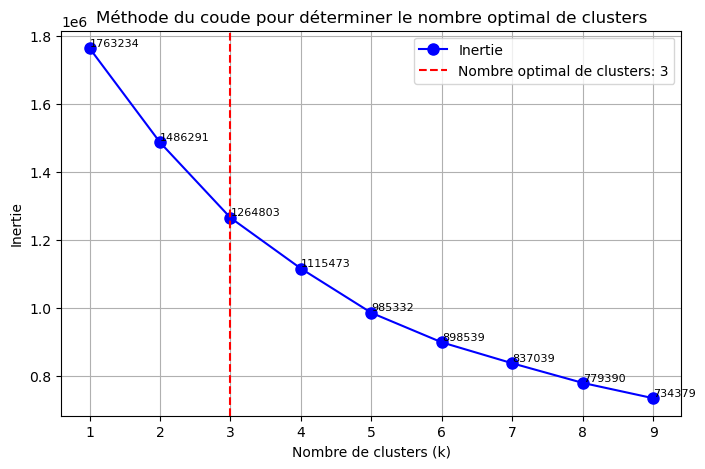

In [131]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Déterminer l'inertie pour différents nombres de clusters
inertias = []
K = range(1, 10)  # Tester de 1 à 9 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertias.append(kmeans.inertia_)  # Stocker l'inertie pour chaque k

# Identifier le "coude" : nombre de clusters où la réduction de l'inertie ralentit
optimal_k = 3  # Par exemple, supposons que le coude est visuellement à k=3 (ajuster selon les données)

# Tracer la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bo-', markersize=8, label='Inertie')

# Ligne verticale pour le nombre optimal de clusters
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Nombre optimal de clusters: {optimal_k}')

# Ajouter des annotations pour l'inertie
for i, inertia in enumerate(inertias):
    plt.text(K[i], inertia, f'{inertia:.0f}', fontsize=8, verticalalignment='bottom')

# Personnalisation du graphique
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.grid(True)
plt.legend()
plt.show()


In [132]:
# Choisir le nombre de clusters optimal basé sur la méthode du coude (par exemple, k=6 si c'est le bon)
optimal_k = 3 # Ici, tu choisiras le bon k en fonction du graphique

# Application du KMeans avec le nombre de clusters optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_df)


C:\Users\mario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [133]:
# Ajouter les clusters au DataFrame original
df_filled_knn['Cluster'] = clusters

# Afficher les 10 premières lignes avec les clusters
print(df_filled_knn.head(10))


                        code  ingredients_from_palm_oil_n  energy_100g  \
234039       3452200004048.0                          0.0       1048.0   
209812       3256220657808.0                          0.0       1035.4   
7147           11161159025.0                          0.0       1163.0   
167829        863441000004.0                          0.0        854.0   
193563       3095757287016.0                          0.0        470.0   
267158       4607001850038.0                          0.0       1470.0   
267578  2088927402753.199951                          0.0       3758.0   
191805       3065620012021.0                          0.0       1536.0   
246758       3596710404100.0                          0.0       1066.0   
21917          25317007214.0                          0.0       1063.0   

        fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
234039     0.200              0.0500              60.000       13.026   
209812    12.480              4.4800   

In [163]:
# Groupby par Cluster et calcul de la moyenne des variables
grouped = df_filled_knn.groupby('Cluster').mean()

# Afficher les résultats
grouped


C:\Users\mario\AppData\Local\Temp\ipykernel_1420\3199706836.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df_filled_knn.groupby('Cluster').mean()


,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
Cluster,,,,,,,,,,,
0,0.041907,1730.384510,22.356393,9.045670,44.578417,25.975781,3.356140,8.815515,1.241769,0.481858,15.278659
1,0.009501,702.774666,6.134100,2.284580,22.550483,8.679996,2.343846,5.970334,1.220357,0.482838,4.567460
2,0.025792,335.744932,2.728860,2.842697,12.628419,10.503840,1.987393,1.387581,64.719147,25.508393,8.515158


# 6. Visualisation des clusters (optionnel)

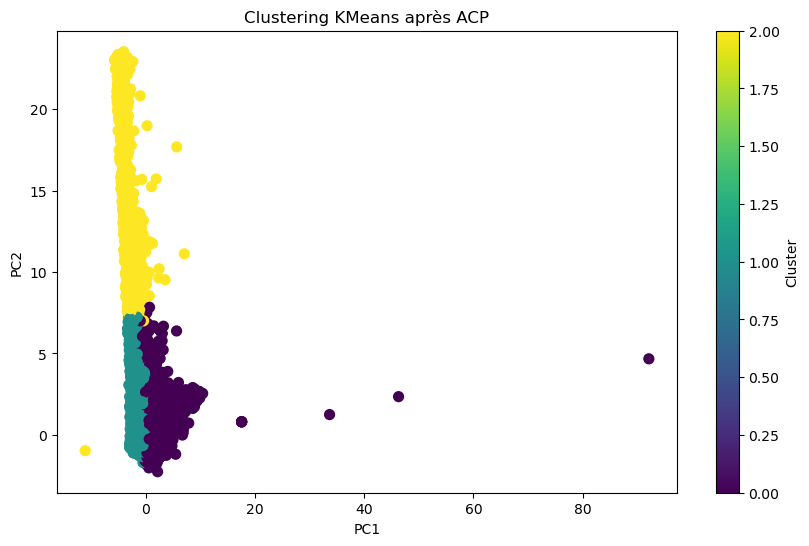

In [134]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=clusters, cmap='viridis', s=50)
plt.title('Clustering KMeans après ACP')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()


# Interprétation des clusters

In [135]:
# Calcul des moyennes des variables par cluster
cluster_summary = df_filled_knn.groupby('Cluster').mean()
cluster_summary


C:\Users\mario\AppData\Local\Temp\ipykernel_1420\2189346503.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df_filled_knn.groupby('Cluster').mean()


,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
Cluster,,,,,,,,,,,
0,0.041907,1730.384510,22.356393,9.045670,44.578417,25.975781,3.356140,8.815515,1.241769,0.481858,15.278659
1,0.009501,702.774666,6.134100,2.284580,22.550483,8.679996,2.343846,5.970334,1.220357,0.482838,4.567460
2,0.025792,335.744932,2.728860,2.842697,12.628419,10.503840,1.987393,1.387581,64.719147,25.508393,8.515158


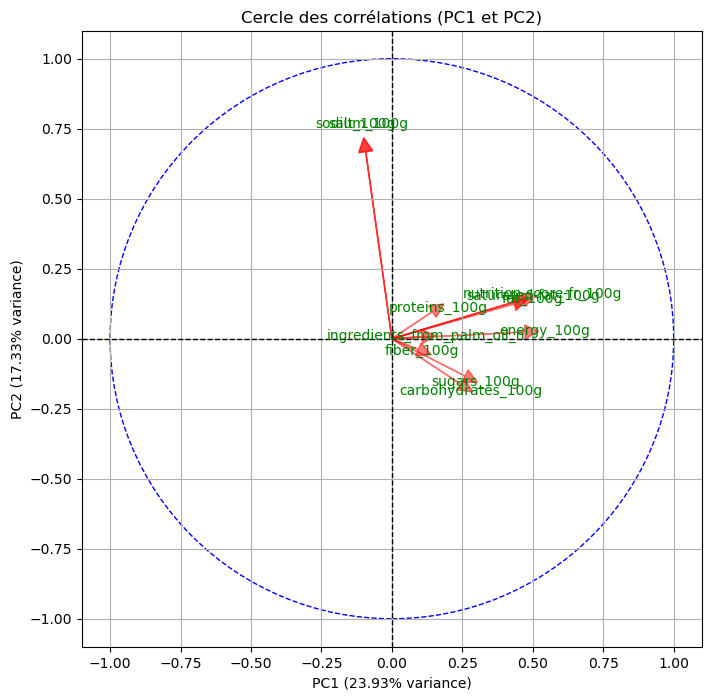

In [136]:
# Fonction pour tracer le cercle des corrélations
def plot_correlation_circle(pca, components, feature_names, pca_result):
    # Taille de la figure
    plt.figure(figsize=(8, 8))
    
    # Création d'un cercle unité
    circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', linewidth=1)
    plt.gca().add_artist(circle)
    
    # Limites de l'axe
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)

    # Tracer les flèches pour chaque variable
    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0, components[i, 0], components[i, 1], color='r', alpha=0.5, 
                  head_width=0.05, head_length=0.05)
        plt.text(components[i, 0]*1.15, components[i, 1]*1.15, feature, color='g', ha='center', va='center')

    # Ajouter les labels et le titre
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
    plt.title('Cercle des corrélations (PC1 et PC2)')

    # Tracer les axes
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    
    plt.grid(True)
    plt.show()

# Extraire les composantes principales pour PC1 et PC2
components = pca.components_.T  # Transposé pour avoir les variables en lignes

# Noms des colonnes utilisées dans l'ACP
feature_names = columns_to_scale

# Appeler la fonction pour tracer le cercle des corrélations
plot_correlation_circle(pca, components[:, :2], feature_names, pca_result)


# test d'ANOVA pour voir si les variables présentent des différences significatives entre les clusters.

In [138]:
from scipy.stats import f_oneway
import pandas as pd

# Préparer les données pour le test ANOVA
anova_results = []

print("### Test ANOVA entre les clusters ###\n")

for col in columns_to_scale:
    # Grouper les valeurs de la colonne par cluster
    groups = [df_filled_knn[df_filled_knn['Cluster'] == cluster][col] for cluster in df_filled_knn['Cluster'].unique()]
    
    # Effectuer le test ANOVA
    f_stat, p_value = f_oneway(*groups)
    
    # Stocker les résultats
    anova_results.append({'Variable': col, 'F-statistic': f_stat, 'p-value': p_value})

    # Afficher les résultats
    print(f"Variable: {col}")
    print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")
    print("-" * 30)

# Résultats ANOVA dans un DataFrame
anova_df = pd.DataFrame(anova_results)

# Afficher les variables significatives (p-value < 0.05)
significant_variables = anova_df[anova_df['p-value'] < 0.05]
print("\n### Variables significativement différentes entre les clusters (p-value < 0.05) ###")
print(significant_variables)


### Test ANOVA entre les clusters ###

Variable: ingredients_from_palm_oil_n
F-statistic: 1275.85, p-value: 0.0000
------------------------------
Variable: energy_100g
F-statistic: 34578.67, p-value: 0.0000
------------------------------
Variable: fat_100g
F-statistic: 29795.39, p-value: 0.0000
------------------------------
Variable: saturated-fat_100g
F-statistic: 24776.98, p-value: 0.0000
------------------------------
Variable: carbohydrates_100g
F-statistic: 17675.80, p-value: 0.0000
------------------------------
Variable: sugars_100g
F-statistic: 20836.01, p-value: 0.0000
------------------------------
Variable: fiber_100g
F-statistic: 1439.13, p-value: 0.0000
------------------------------
Variable: proteins_100g
F-statistic: 3160.82, p-value: 0.0000
------------------------------
Variable: salt_100g
F-statistic: 178766.58, p-value: 0.0000
------------------------------
Variable: sodium_100g
F-statistic: 181254.38, p-value: 0.0000
------------------------------
Variable: nutrit

# solution pour améliorer la base de donnée à l'avenir : 

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# Fonction pour demander à l'utilisateur de remplir les champs d'un produit
def entrer_donnees_produit():
    produit = {}

    # Demander les informations générales
    produit['code'] = input("Veuillez entrer le code du produit : ")
    produit['url'] = input("Veuillez entrer l'URL du produit : ")
    produit['creator'] = input("Veuillez entrer votre nom (créateur du produit) : ")
    produit['created_datetime'] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    produit['last_modified_datetime'] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    produit['product_name'] = input("Veuillez entrer le nom du produit : ")
    produit['brands'] = input("Veuillez entrer la marque du produit : ")
    produit['countries_fr'] = input("Veuillez entrer le pays de fabrication : ")
    produit['ingredients_text'] = input("Veuillez entrer les ingrédients du produit : ")
    produit['serving_size'] = input("Veuillez entrer la taille de la portion : ")
    produit['additives_n'] = input("Veuillez entrer le nombre d'additifs : ")
    produit['additives'] = input("Veuillez entrer les additifs (si applicable) : ")
    
    # Demander la quantité d'ingrédients d'huile de palme et vérifier si elle est dans les limites
    def verifier_valeur_aberrante(valeur, nom_du_champ):
        while valeur > 100 or valeur < 0:
            print(f"Valeur aberrante pour {nom_du_champ}. Elle doit être comprise entre 0 et 100 grammes.")
            valeur = float(input(f"Veuillez entrer une nouvelle valeur pour {nom_du_champ} (en g pour 100g) : "))
        return valeur

    # Informations nutritionnelles avec vérification des valeurs aberrantes
    produit['ingredients_from_palm_oil_n'] = verifier_valeur_aberrante(float(input("Veuillez entrer la quantité d'ingrédients d'huile de palme (en g pour 100g) : ")), 'ingrédients d\'huile de palme')
    produit['nutrition_grade_fr'] = input("Veuillez entrer le grade nutritionnel (A, B, C, D, E) : ").upper()
    produit['states_fr'] = input("Veuillez entrer l'état du produit (ex: vendu, ouvert) : ")
    produit['energy_100g'] = verifier_valeur_aberrante(float(input("Veuillez entrer la quantité d'énergie (en kcal pour 100g) : ")), 'énergie')
    produit['fat_100g'] = verifier_valeur_aberrante(float(input("Veuillez entrer la quantité de lipides (en g pour 100g) : ")), 'lipides')
    produit['saturated-fat_100g'] = verifier_valeur_aberrante(float(input("Veuillez entrer la quantité d'acides gras saturés (en g pour 100g) : ")), 'acides gras saturés')
    produit['carbohydrates_100g'] = verifier_valeur_aberrante(float(input("Veuillez entrer la quantité de glucides (en g pour 100g) : ")), 'glucides')
    produit['sugars_100g'] = verifier_valeur_aberrante(float(input("Veuillez entrer la quantité de sucres (en g pour 100g) : ")), 'sucres')
    produit['fiber_100g'] = verifier_valeur_aberrante(float(input("Veuillez entrer la quantité de fibres (en g pour 100g) : ")), 'fibres')
    produit['proteins_100g'] = verifier_valeur_aberrante(float(input("Veuillez entrer la quantité de protéines (en g pour 100g) : ")), 'protéines')
    produit['salt_100g'] = verifier_valeur_aberrante(float(input("Veuillez entrer la quantité de sel (en g pour 100g) : ")), 'sel')
    produit['sodium_100g'] = verifier_valeur_aberrante(float(input("Veuillez entrer la quantité de sodium (en mg pour 100g) : ")), 'sodium')
    produit['nutrition-score-fr_100g'] = float(input("Veuillez entrer le score nutritionnel (France) pour 100g : "))

    # Vérification de la cohérence entre le score nutritionnel et le grade
    def verifier_coherence_score_grade(score, grade):
        if score <= 2 and grade != 'A':
            print("Erreur : Le grade nutritionnel ne correspond pas au score nutritionnel. Le grade devrait être 'A'.")
        elif 3 <= score <= 10 and grade != 'B':
            print("Erreur : Le grade nutritionnel ne correspond pas au score nutritionnel. Le grade devrait être 'B'.")
        elif 11 <= score <= 18 and grade != 'C':
            print("Erreur : Le grade nutritionnel ne correspond pas au score nutritionnel. Le grade devrait être 'C'.")
        elif 19 <= score <= 30 and grade != 'D':
            print("Erreur : Le grade nutritionnel ne correspond pas au score nutritionnel. Le grade devrait être 'D'.")
        elif score > 30 and grade != 'E':
            print("Erreur : Le grade nutritionnel ne correspond pas au score nutritionnel. Le grade devrait être 'E'.")

    verifier_coherence_score_grade(produit['nutrition-score-fr_100g'], produit['nutrition_grade_fr'])

    return produit

# Appel de la fonction pour récupérer les informations d'un produit
produit_data = entrer_donnees_produit()

# Créer un DataFrame avec les données recueillies
df_produit = pd.DataFrame([produit_data])

# Afficher le DataFrame créé
print("\nDonnées du produit entrées :")
print(df_produit)


In [ ]:
df_produit

